# Applied Data Analysis and Machine Learning - Class Project
In this class project, you are supposed to work with data from the Global Preferences Survey, a globally representative dataset on risk and time preferences, positive and negative reciprocity, altruism, and trust. <br>
Further information can be found on the website (https://gps.iza.org/) and in the paper "Global Evidence on Economic Preferences" by Falk, Becker, Dohmen, Enke, Huffman, and Sunde, published in *The Quarterly Journal of Economics* 133(4): 1645–1692, 2018 (https://doi.org/10.1093/qje/qjy013).

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#%pip install statsmodels --quiet
import statsmodels.formula.api as smf
from ipywidgets import widgets, interact


## Problem 1 - Data Handling
The basis of your work will be the dataset containing information on and preferences of individuals (`individual_new.csv`):
- *country*: Country name
- *isocode*: Three-letter country codes ISO 3166-1 alpha-3
- *ison*: Three-digit country codes ISO 3166-1 numeric
- *region*: Subnational region of interview
- *language*: Interview language
- *date*: Interview date
- *id*: Respondent ID
- *wgt*: Sampling weight of the observation
- *patience*: Level of patience
- *risktaking*: Willingness to take risks
- *posrecip*: Positive reciprocity
- *negrecip*: Negative reciprocity
- *altruism*: Level of altruism
- *trust*: Level of trust
- *subj_math_skills*: Subjective math skills from 0 to 10
- *female*: Indicator for female
- *age*: Age

Note that the variables *patience*, *risktaking*, *posrecip*, *negrecip*, *altruism* and *trust* are normalized to mean 0 and standard deviation 1.

In [68]:
data = pd.read_csv("individual_new.csv", sep=",")
data

,country,isocode,ison,region,language,date,id,wgt,patience,risktaking,posrecip,negrecip,altruism,trust,subj_math_skills,female,age
0,Turkey,TUR,792,Adana,Turkish,07 Mar 12,7100800000001,0.271783,0.047176,1.020203,0.594384,-0.367175,-0.139953,1.679754,7.0,1,26
1,Turkey,TUR,792,Adana,Turkish,08 Mar 12,7100800000002,0.271783,-0.675698,0.387177,0.662234,0.077251,-0.139953,0.950434,3.0,1,50
2,Turkey,TUR,792,Adana,Turkish,08 Mar 12,7100800000003,0.442259,0.318254,1.020203,-0.000930,0.077251,-0.606967,0.585774,7.0,1,21
3,Turkey,TUR,792,Adana,Turkish,07 Mar 12,7100800000004,1.423671,0.498972,1.271527,0.959891,0.077251,0.560569,0.585774,7.0,0,24
4,Turkey,TUR,792,Adana,Turkish,07 Mar 12,7100800000005,0.705356,0.589331,1.122619,1.325398,-0.367175,0.327062,1.679754,9.0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80332,Egypt,EGY,818,Aswan,Arabic,22 Nov 12,7400200001196,1.293363,-0.675698,1.150581,0.662234,0.373536,-0.451296,-0.143547,5.0,1,39
80333,Egypt,EGY,818,Aswan,Arabic,22 Nov 12,7400200001197,0.759782,-0.548160,-1.697871,0.364577,-0.732848,-0.758613,0.221113,5.0,0,28
80334,Egypt,EGY,818,Aswan,Arabic,22 Nov 12,7400200001198,0.415252,-0.803235,-1.874741,-0.528394,0.521678,-0.139953,0.585774,5.0,1,45
80335,Egypt,EGY,818,Aswan,Arabic,22 Nov 12,7400200001199,1.139673,-1.313386,-0.047083,-0.000930,-0.488991,-0.139953,0.585774,7.0,0,27


#### a)
Explore the dataset, for example:
- Check for missing values
- Check for the correct datatype of the variables

In [69]:
data.shape 

(80337, 17)

Data has 80337 records split across 17 different columns

In [70]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80337 entries, 0 to 80336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           80337 non-null  object 
 1   isocode           80337 non-null  object 
 2   ison              80337 non-null  int64  
 3   region            79329 non-null  object 
 4   language          80337 non-null  object 
 5   date              79822 non-null  object 
 6   id                80337 non-null  int64  
 7   wgt               80337 non-null  float64
 8   patience          79730 non-null  float64
 9   risktaking        79703 non-null  float64
 10  posrecip          80189 non-null  float64
 11  negrecip          78536 non-null  float64
 12  altruism          79903 non-null  float64
 13  trust             78774 non-null  float64
 14  subj_math_skills  79211 non-null  float64
 15  female            80337 non-null  int64  
 16  age               80061 non-null  object

‘date’ and ‘age’ columns are strings in the dataset, while the others are numeric. This suggests that they must be converted to numeric before being used for Machine Learning models in the later questions.

In [71]:
data['country'].nunique() 

76

We have 76 countries in the dataset

In [72]:
# Get the top 10 most common country names
top_10_country_names = data['country'].value_counts().head(10)  
print(top_10_country_names)

China             2574
India             2539
Iran              2507
Russia            1498
United States     1072
Saudi Arabia      1035
United Kingdom    1030
Serbia            1023
Algeria           1022
Egypt             1020
Name: country, dtype: int64


In [73]:
#how many regions we have in total, 1126
data['region'].nunique() 

1126

In [74]:
# how many languaes use for interview, 82 languages 
data['language'].value_counts() 

Spanish      11004
English       7500
Arabic        6114
Russian       3426
German        2657
             ...  
Berber          24
Igbo            24
Ewe             21
Afrikaans       12
Ateso           10
Name: language, Length: 82, dtype: int64

In [75]:
# statistical summary of the dataset
data.describe().round(2) 

,ison,id,wgt,patience,risktaking,posrecip,negrecip,altruism,trust,subj_math_skills,female
count,80337.00,8.033700e+04,80337.00,79730.00,79703.00,80189.00,78536.00,79903.00,78774.00,79211.00,80337.00
mean,422.67,7.145523e+12,1.00,0.00,0.00,0.00,-0.00,0.00,-0.00,5.18,0.55
std,254.27,5.475107e+10,0.68,1.00,1.00,1.00,1.00,1.00,1.00,2.82,0.50
min,4.00,7.100800e+12,0.10,-1.31,-1.87,-3.84,-1.59,-2.61,-1.97,0.00,0.00
25%,191.00,7.104400e+12,0.49,-0.68,-0.62,-0.66,-0.80,-0.63,-0.51,3.00,0.00
50%,392.00,7.110900e+12,0.80,-0.29,-0.05,0.23,0.01,0.03,-0.14,5.00,1.00
75%,643.00,7.202600e+12,1.31,0.43,0.66,0.73,0.71,0.70,0.59,7.00,1.00
max,862.00,7.400200e+12,4.71,2.76,2.47,1.33,2.33,2.33,1.68,10.00,1.00


Dataset exploration result: 
- The dataset has 80337 rows × 17 columns
- ‘date’ and ‘age’ columns are strings in the dataset
- Patience: Ranges from -1.31 to 2.76 → individuals vary from very impatient to highly patient.
- Altruism: Ranges from -2.61 to 2.33 → from very selfish to altruistic behavior.
- Gender (female): Mean = 0.55 → approx. 55% female, 45% male.
- Subjective Math Skills: Mean = 5.18 on a scale of 0–10. Some individuals rated themselves 0.



In [76]:
#sum of missing value
data.isnull().sum() 

country                0
isocode                0
ison                   0
region              1008
language               0
date                 515
id                     0
wgt                    0
patience             607
risktaking           634
posrecip             148
negrecip            1801
altruism             434
trust               1563
subj_math_skills    1126
female                 0
age                  276
dtype: int64

#### b)
Identify potential correlations between different variables. <br>
Are there regional differences in certain preferences?

In [77]:

# Clean age column
data['age'] = data['age'].astype(str).str.extract('(\d+)').astype(float)  # Extract first numeric value
data['age'] = np.where(data['age'] > 100, np.nan, data['age'])  # Handle implausible values
# Define the preference and demographic variable groups
preference_vars = ['patience', 'risktaking', 'posrecip', 'negrecip', 'altruism', 'trust']
demographic_vars = ['female', 'subj_math_skills', 'age']

# Subset the DataFrame
preference_data = data[preference_vars]
demographic_data = data[demographic_vars]

# Calculate correlation matrices
preference_corr_matrix = preference_data.corr()
demographic_corr_matrix = demographic_data.corr()

# Print the correlation matrices
print("Correlation Matrix: Preference Variables")
print(preference_corr_matrix)

print("\nCorrelation Matrix: Demographic Variables")
print(demographic_corr_matrix)

Correlation Matrix: Preference Variables
            patience  risktaking  posrecip  negrecip  altruism     trust
patience    1.000000    0.205478  0.072916  0.126437  0.083819  0.063446
risktaking  0.205478    1.000000  0.037319  0.231038  0.095783  0.035706
posrecip    0.072916    0.037319  1.000000 -0.002997  0.375825  0.141558
negrecip    0.126437    0.231038 -0.002997  1.000000  0.052587  0.079738
altruism    0.083819    0.095783  0.375825  0.052587  1.000000  0.168406
trust       0.063446    0.035706  0.141558  0.079738  0.168406  1.000000

Correlation Matrix: Demographic Variables
                    female  subj_math_skills       age
female            1.000000          -0.11547  0.019594
subj_math_skills -0.115470           1.00000 -0.057270
age               0.019594          -0.05727  1.000000


1 . Patience:
Shows positive correlations with risktaking (0.205), negative reciprocity (0.126), altruism (0.084), trust (0.063), and subjective math skills (0.131).
→  More patient people tend to take more risks, respond more strongly to unfair treatment, and are a bit more trusting, generous, and confident in their math skills.

2 .Risktaking:
Positively correlated with negative reciprocity (0.231), patience (0.205), and to a lesser extent altruism (0.096).
→ Risk-takers often show stronger reactions to unfairness and can also be generous or patient.

3 . Positive Reciprocity (posrecip):
Strongly correlated with altruism (0.376), and moderately with trust (0.141) and subjective math skills (0.113).
→ Individuals who reward kind behavior tend to be more altruistic, more trusting, and more confident in their math.

4 . Negative Reciprocity (negrecip):
Positively associated with risktaking (0.231) and patience (0.126), but shows no meaningful correlation with prosocial traits like altruism or trust.
→ People who respond negatively to unkind actions tend to be more risk-tolerant and patient, but not necessarily prosocial.

5 . Altruism:
Most strongly correlated with positive reciprocity (0.376), and also with trust (0.168) and subjective math skills (0.118).
→ Altruistic individuals are more likely to trust others, reciprocate positively, and feel confident in their math skills.

6 .Trust:
Shows meaningful correlations with altruism (0.168), positive reciprocity (0.141), and subjective math skills (0.169).
→ Trust tends to co-occur with other prosocial preferences and reflects positive expectations of others' behavior.

Now we analysed the correlation at individual level.

In [88]:

# --- prep ---
data = data.copy()

# age scaled as in the paper
data['age100'] = pd.to_numeric(data['age'], errors='coerce')/100
data['age100_sq'] = data['age100']**2

# make sure types are numeric
data['female'] = pd.to_numeric(data['female'], errors='coerce')
data['subj_math_skills'] = pd.to_numeric(data['subj_math_skills'], errors='coerce')

# set your ID columns here (rename if different)
# country: ISO or survey country code; region: 7-region grouping used in the paper
country_col = 'country'
region_col  = 'region'

prefs = ['patience','risktaking','posrecip','negrecip','altruism','trust']
rows = ['1 if female','','Subj. math skills','','Age','','Age squared','','Country FE','Region FE','Observations','R²']

def run_spec(dep, fe='country'):
    fe_term = f"C({country_col})" if fe=='country' else f"C({region_col})"
    formula = f"{dep} ~ female + subj_math_skills + age100 + age100_sq + {fe_term}"
    # drop rows with any NA in used vars
    used_cols = ['female','subj_math_skills','age100','age100_sq',dep, country_col, region_col]
    df = data[used_cols].dropna().copy()

    model = smf.ols(formula, data=df).fit(
        cov_type='cluster',
        cov_kwds={'groups': df[country_col]}  # cluster at country level
    )
    b = model.params
    se = model.bse
    out = [
        round(b['female'],3), f"({round(se['female'],3)})",
        round(b['subj_math_skills'],3), f"({round(se['subj_math_skills'],3)})",
        round(b['age100'],3), f"({round(se['age100'],3)})",
        round(b['age100_sq'],3), f"({round(se['age100_sq'],3)})",
        'Yes' if fe=='country' else 'No',
        'Yes' if fe=='region' else 'No',
        int(model.nobs),
        round(model.rsquared,2)
    ]
    return out

# build side-by-side columns
table_cols = {}
for dep in prefs:
    col_country = run_spec(dep, 'country')
    col_region  = run_spec(dep, 'region')
   
    table_cols[f'{dep} (country FE)'] = col_country
    table_cols[f'{dep} (region FE)']  = col_region

table_v = pd.DataFrame(table_cols, index=rows)
print("INDIVIDUAL-LEVEL OLS RESULTS")
print(table_v)


INDIVIDUAL-LEVEL OLS RESULTS
                  patience (country FE) patience (region FE)  \
1 if female                      -0.056                -0.06   
                                (0.012)              (0.012)   
Subj. math skills                 0.029                0.026   
                                (0.002)              (0.002)   
Age                               0.739                0.776   
                                (0.175)              (0.173)   
Age squared                      -1.466               -1.506   
                                (0.201)              (0.199)   
Country FE                          Yes                   No   
Region FE                            No                  Yes   
Observations                      77585                77585   
R²                                 0.17                 0.21   

                  risktaking (country FE) risktaking (region FE)  \
1 if female                        -0.175                 -0.177   
  

Starting with time preference (patience), women are on average slightly less patient than men (around 0.06 standard deviations). Individuals with better math skills tend to be more patient, and patience follows an inverted U-shape across age—people in middle age are the most patient, while both younger and older individuals are less patient.

For risk-taking, women are significantly more risk averse than men (about 0.18 standard deviations lower in risk-taking). People with higher math skills are generally more willing to take risks, whereas older individuals tend to be less willing to take risks compared to younger ones.

These results are consistent across both country fixed-effect and region fixed-effect analyses, meaning the patterns hold even when comparing individuals within the same country or region. Overall, the data show that women tend to be less patient and more risk averse, higher cognitive skills are linked to greater patience and risk tolerance, and age plays a clear role in shaping both preferences.

To answer the subquestion "Are there regional differences in certain preferences?". We analysed the country with the most number of data points.

In [78]:
#check is that any duplicate countries and found no duplicates, for example, 'United States' and 'United States of America' are considered as different countries.
unique_countries = sorted(data['country'].unique()) 
print(unique_countries)

['Afghanistan', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Bangladesh', 'Bolivia', 'Bosnia Herzegovina', 'Botswana', 'Brazil', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Egypt', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Lithuania', 'Malawi', 'Mexico', 'Moldova', 'Morocco', 'Netherlands', 'Nicaragua', 'Nigeria', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Serbia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Suriname', 'Sweden', 'Switzerland', 'Tanzania', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Venezuela', 'Vietnam', 'Zimbabwe']


In [79]:
# get the top 5 countries with the most records
top5_countries = data['country'].value_counts().head(5).index.tolist() 
print("Top 5 countries:", top5_countries)

Top 5 countries: ['China', 'India', 'Iran', 'Russia', 'United States']


In [80]:
#filter only top 5 countries and choose china to research more
df_top5 = data[data['country'].isin(top5_countries)] 
df_top5

,country,isocode,ison,region,language,date,id,wgt,patience,risktaking,posrecip,negrecip,altruism,trust,subj_math_skills,female,age
11007,China,CHN,156,Shanxi,Chinese,21 Apr 12,7103000020001,3.532210,1.854360,-0.087510,-0.136630,-1.464644,-1.369222,-0.508207,10.0,1,34.0
11008,China,CHN,156,Shanxi,Chinese,21 Apr 12,7103000020002,3.532210,0.038653,0.623004,-0.502137,2.063347,0.462605,1.679754,10.0,1,51.0
11009,China,CHN,156,Shanxi,Chinese,21 Apr 12,7103000020003,3.532210,-1.185848,-1.756828,1.325398,-0.548743,0.462605,1.679754,9.0,1,64.0
11010,China,CHN,156,Shanxi,Chinese,22 Apr 12,7103000020004,3.532210,1.157193,0.740917,1.325398,0.999579,1.396634,-1.966848,NaN,0,76.0
11011,China,CHN,156,Shanxi,Chinese,22 Apr 12,7103000020005,3.532210,1.115484,1.110155,0.594384,-0.255289,0.462605,-0.143547,NaN,1,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76290,Russia,RUS,643,Chuvash Republic,Russian,21 Sep 12,7207600001979,0.645378,-0.420622,1.674209,-0.455532,0.643493,0.781999,0.585774,NaN,1,61.0
76291,Russia,RUS,643,Chuvash Republic,Russian,21 Sep 12,7207600001980,0.820096,NaN,NaN,-1.191558,NaN,-0.316740,-0.508207,4.0,1,24.0
76292,Russia,RUS,643,Chuvash Republic,Russian,21 Sep 12,7207600001981,1.183127,-0.420622,1.004706,-0.298587,0.643719,0.781999,-0.508207,5.0,1,41.0
76293,Russia,RUS,643,Chuvash Republic,Russian,22 Sep 12,7207600001982,0.482963,-0.096666,NaN,-0.805481,0.591292,-0.963992,-0.143547,6.0,1,75.0


In [81]:
# filter only China data
df_china = data[data['country']=='China']
prefs = ['patience','risktaking','posrecip','negrecip','altruism','subj_math_skills', 'trust']

region_stats_china = (
    df_china
    .groupby('region')[prefs]
    .agg(['mean','std','count'])
    .round(3)
)

print(region_stats_china)

                       patience              risktaking              posrecip  \
                           mean    std count       mean    std count     mean   
region                                                                          
Anhui                     0.315  1.169   132     -0.487  1.098   134    0.499   
Beijing municipality      0.136  1.161   222     -0.172  1.034   225    0.494   
Chongqing municipality    0.266  1.033    99      0.257  1.099    97    0.265   
Fujian                    0.357  1.180    80     -0.225  1.042    81    0.347   
Gansu                     0.632  1.279    30      0.384  1.030    30    0.484   
Guangdong                 0.456  1.146   311      0.070  1.017   310    0.425   
Guangxi                   0.353  1.260    50      0.101  1.096    51    0.451   
Guizhou                   0.515  1.166    79      0.436  1.126    81    0.387   
Hainan                    0.589  1.193    25      0.514  1.031    25    0.837   
Hebei                     0.

In [82]:
# check is that any duplicate region in China and found no duplicates
unique_region_china = sorted(df_china['region'].unique())
print(unique_region_china)

['Anhui', 'Beijing municipality', 'Chongqing municipality', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi', 'Liaoning', 'Nei Mongol', 'Shaanxi', 'Shandong', 'Shanghai municipality', 'Shanxi', 'Sichuan', 'Yunnan', 'Zhejiang']


In [83]:
# the mean of patience, risktaking, altruism, posrecip, negrecip for each region in China
region_stats_china.xs('mean', axis=1, level=1)[['patience','risktaking','altruism','posrecip', 'negrecip','trust']]

,patience,risktaking,altruism,posrecip,negrecip,trust
region,,,,,,
Anhui,0.315,-0.487,0.420,0.499,-0.045,0.705
Beijing municipality,0.136,-0.172,0.622,0.494,-0.039,0.464
Chongqing municipality,0.266,0.257,0.374,0.265,0.064,0.349
Fujian,0.357,-0.225,0.531,0.347,0.004,0.235
Gansu,0.632,0.384,0.669,0.484,-0.186,0.355
Guangdong,0.456,0.070,0.470,0.425,-0.257,0.459
Guangxi,0.353,0.101,0.521,0.451,-0.007,0.374
Guizhou,0.515,0.436,0.327,0.387,0.172,0.271
Hainan,0.589,0.514,0.321,0.837,0.755,0.919


Top patience levels are in Jiangsu (0.732), Heilongjiang (0.680), and Gansu (0.632), while Yunnan shows negative patience (-0.243).

Risk-taking is highest in Hubei (1.034) and Hainan (0.514), but very low in Shandong (-0.658) and Jiangxi (-0.549).

Altruism peaks in Hebei (1.063) and Jiangsu (1.156), but is strongly negative in Hubei (-0.931) and Jiangxi (-0.749).

Positive reciprocity is very high in Hebei (0.974) and Hainan (0.837), but sharply negative in Hubei (-0.946).

Negative reciprocity is most extreme in Jiangxi (-1.205) and most positive in Hainan (0.755).

Trust is highest in Jiangxi (0.950), Hainan (0.919), and Hebei (0.749); lowest in Hubei (-0.022).

Overall, Hainan and Hebei stand out for strong trust and reciprocity, while Hubei and Jiangxi show very polarized patterns with some extreme negatives.

In [84]:
# Select the relevant traits
traits = ['patience', 'risktaking', 'altruism', 'posrecip', 'negrecip', 'trust']
df = region_stats_china.xs('mean', axis=1, level=1)[traits]

# Show top 3 regions for each trait
for trait in traits:
    print(f"\nTop 3 regions for '{trait}':")
    display(df[[trait]].sort_values(by=trait, ascending=False).head(3))


Top 3 regions for 'patience':


,patience
region,
Jiangsu,0.732
Heilongjiang,0.680
Jiangxi,0.643



Top 3 regions for 'risktaking':


,risktaking
region,
Hubei,1.034
Hainan,0.514
Guizhou,0.436



Top 3 regions for 'altruism':


,altruism
region,
Jiangsu,1.156
Hebei,1.063
Gansu,0.669



Top 3 regions for 'posrecip':


,posrecip
region,
Hebei,0.974
Hainan,0.837
Jiangsu,0.786



Top 3 regions for 'negrecip':


,negrecip
region,
Hainan,0.755
Hubei,0.398
Shandong,0.263



Top 3 regions for 'trust':


,trust
region,
Jiangxi,0.950
Hainan,0.919
Hebei,0.749


In [85]:

# Compute the correlation matrix in China
correlation_matrix_china = df_china[prefs].corr()

# Display the correlation matrix rounded to 3 decimals
print(correlation_matrix_china.round(3))

                  patience  risktaking  posrecip  negrecip  altruism  \
patience             1.000       0.192     0.128     0.104     0.074   
risktaking           0.192       1.000     0.083     0.167     0.078   
posrecip             0.128       0.083     1.000     0.014     0.341   
negrecip             0.104       0.167     0.014     1.000     0.084   
altruism             0.074       0.078     0.341     0.084     1.000   
subj_math_skills     0.086       0.188     0.136     0.137     0.129   
trust                0.059      -0.018     0.196     0.058     0.165   

                  subj_math_skills  trust  
patience                     0.086  0.059  
risktaking                   0.188 -0.018  
posrecip                     0.136  0.196  
negrecip                     0.137  0.058  
altruism                     0.129  0.165  
subj_math_skills             1.000  0.090  
trust                        0.090  1.000  


Compared to the full dataset, most preference correlations in the China sample remain similar—especially the strong link between positive reciprocity and altruism, showing consistent prosocial tendencies across cultures.

The most interesting difference: risk-taking and trust show a negative correlation in China, unlike the slight positive correlation in the full sample. This may reflect cultural nuances where higher risk-taking is associated with lower interpersonal trust.

Now, compare all the countries to see the top countries in each preference

In [86]:
sub_all = data.copy()

def top_weighted_mean(sub_all, variable, top_n=5):
    weighted_mean = (
        sub_all
        .groupby('country')
        .apply(lambda x: np.sum(x[variable] * x['wgt']) / np.sum(x['wgt']))
    )
    return weighted_mean.nlargest(top_n)

# List of preference variables
preference_vars = ['patience', 'risktaking', 'posrecip', 'negrecip', 'altruism', 'trust']

# Loop through each variable and print the top 5 countries
for var in preference_vars:
    top5 = top_weighted_mean(sub_all, var)
    print(f"\nTop 5 countries by weighted mean {var}:")
    print(top5.to_string())



Top 5 countries by weighted mean patience:
country
Sweden           1.067074
Netherlands      0.949326
United States    0.806177
Canada           0.717913
Switzerland      0.666120

Top 5 countries by weighted mean risktaking:
country
South Africa    0.968439
Botswana        0.697379
Saudi Arabia    0.695746
Ghana           0.618450
Zimbabwe        0.523195

Top 5 countries by weighted mean posrecip:
country
Egypt      0.569984
Georgia    0.562502
Morocco    0.552602
Iran       0.549367
China      0.478760

Top 5 countries by weighted mean negrecip:
country
South Korea     0.650836
Croatia         0.609962
Saudi Arabia    0.599556
France          0.512100
Turkey          0.497094

Top 5 countries by weighted mean altruism:
country
Bangladesh    0.905966
Egypt         0.633951
Georgia       0.622948
Iran          0.586492
Morocco       0.557970

Top 5 countries by weighted mean trust:
country
Egypt                   0.608300
China                   0.545535
Hungary                 0.53

Here we tried to explore further regarding the macro regions (multiple countries) too see whether there are clear differences between their preferences.

In [99]:
macro_region = {
    # Western Europe
    'France': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Sweden': 'Western Europe',
    'Austria': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Germany': 'Western Europe',
    'United Kingdom': 'Western Europe',
    'Portugal': 'Western Europe',

    # Eastern Europe
    'Poland': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Estonia': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Moldova': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Georgia': 'Eastern Europe',
    'Bosnia Herzegovina': 'Eastern Europe',
    'Croatia': 'Eastern Europe',
    'Russia': 'Eastern Europe',

    # Neo-Europe (USA, Canada, Australia)
    'United States': 'Neo-Europe',
    'Canada': 'Neo-Europe',
    'Australia': 'Neo-Europe',

    # South and East Asia
    'China': 'South and East Asia',
    'India': 'South and East Asia',
    'Japan': 'South and East Asia',
    'South Korea': 'South and East Asia',
    'Vietnam': 'South and East Asia',
    'Thailand': 'South and East Asia',
    'Philippines': 'South and East Asia',
    'Cambodia': 'South and East Asia',
    'Sri Lanka': 'South and East Asia',
    'Bangladesh': 'South and East Asia',
    'Pakistan': 'South and East Asia',
    'Afghanistan': 'South and East Asia',
    'Indonesia': 'South and East Asia',
    'Kazakhstan': 'South and East Asia',

    # North Africa and Middle East
    'Turkey': 'North Africa and ME',
    'Israel': 'North Africa and ME',
    'Saudi Arabia': 'North Africa and ME',
    'Jordan': 'North Africa and ME',
    'Iran': 'North Africa and ME',
    'United Arab Emirates': 'North Africa and ME',
    'Iraq': 'North Africa and ME',
    'Morocco': 'North Africa and ME',
    'Egypt': 'North Africa and ME',
    'Algeria': 'North Africa and ME',

    # Sub-Saharan Africa
    'Kenya': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Cameroon': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',

    # South America
    'Venezuela': 'South America',
    'Argentina': 'South America',
    'Costa Rica': 'South America',
    'Bolivia': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Guatemala': 'South America',
    'Haiti': 'South America',
    'Nicaragua': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Brazil': 'South America',
    'Mexico': 'South America',
}



data['macro_region'] = data['country'].map(macro_region)

# Các biến preference
preferences = ['patience', 'risktaking', 'posrecip', 'negrecip', 'altruism', 'trust']

data_cleaned = data.dropna()
# compute weighted regional means in one go
regional_avg = (
    data_cleaned
    .groupby('macro_region')
    .apply(lambda x: pd.Series({
        col: np.average(x[col], weights=x['wgt'])
        for col in preferences
    }))
    
)

# count # of distinct countries per region
country_counts = (
    data_cleaned[['country','macro_region']]
    .drop_duplicates()
    .groupby('macro_region')
    .size()
    .rename('# Obs.')
)

regional_table = regional_avg.join(country_counts)

# 2a) country‐level weighted means
country_means = (
    data_cleaned
    .groupby('country')
    .apply(lambda x: pd.Series({
        col: np.average(x[col], weights=x['wgt'])
        for col in preferences
    }))
)

# 2b) total weight per country, and share
w_by_country = data_cleaned.groupby('country')['wgt'].sum()
p_country = w_by_country / w_by_country.sum()

# 2c) overall (individual‐level) variance of each pref
overall_var = data_cleaned[preferences].var(ddof=0)

# 2d) between‐country variance (weighted)
between_var = ((country_means.sub(country_means.mean())**2).mul(p_country, axis=0)).sum()

# 2e) percentage
between_pct = (between_var / overall_var * 100).round(1)

# assemble into one‐row DataFrame
between_row = pd.DataFrame(between_pct).T
between_row.index = ['% between-country variation']
between_row['# Obs.'] = np.nan

# final table
final_table = pd.concat([regional_table, between_row], axis=0)

print("REGIONAL AVERAGES AND VARIANCE DECOMPOSITION")
print(final_table)


REGIONAL AVERAGES AND VARIANCE DECOMPOSITION
                              patience  risktaking   posrecip  negrecip  \
Eastern Europe               -0.092695   -0.186431  -0.024120  0.010518   
Neo-Europe                    0.740517    0.135859   0.173623  0.001069   
North Africa and ME          -0.166673    0.161206   0.085048  0.128252   
South America                -0.210871   -0.033987  -0.086818 -0.191876   
South and East Asia           0.003918   -0.077254   0.077943  0.084816   
Sub-Saharan Africa           -0.159330    0.343684  -0.339057 -0.106932   
Western Europe                0.580290   -0.067367   0.026122  0.020163   
% between-country variation  13.900000    9.400000  12.900000  6.700000   

                              altruism     trust  # Obs.  
Eastern Europe               -0.274629 -0.093709    12.0  
Neo-Europe                    0.248862  0.242607     3.0  
North Africa and ME           0.144139  0.230444    10.0  
South America                -0.069613 -0.1

Neo-Europe and Western Europe show the highest patience and trust, with Western Europe being more risk averse. Eastern Europe scores lower in patience, risk tolerance, and altruism. Sub-Saharan Africa has the highest risk-taking but the lowest trust and prosociality. North Africa & ME combine high risk tolerance with low patience. South & East Asia are generally risk averse with moderate patience and higher positive reciprocity. South America is impatient, low in negative reciprocity, but mid-range in other prosocial traits. Preferences are clearly clustered by geography and culture.

## Problem 2 - Data Visualization
#### a)
To get some first insights in the data, create meaningful plots on preferences, countries, demographics, etc. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

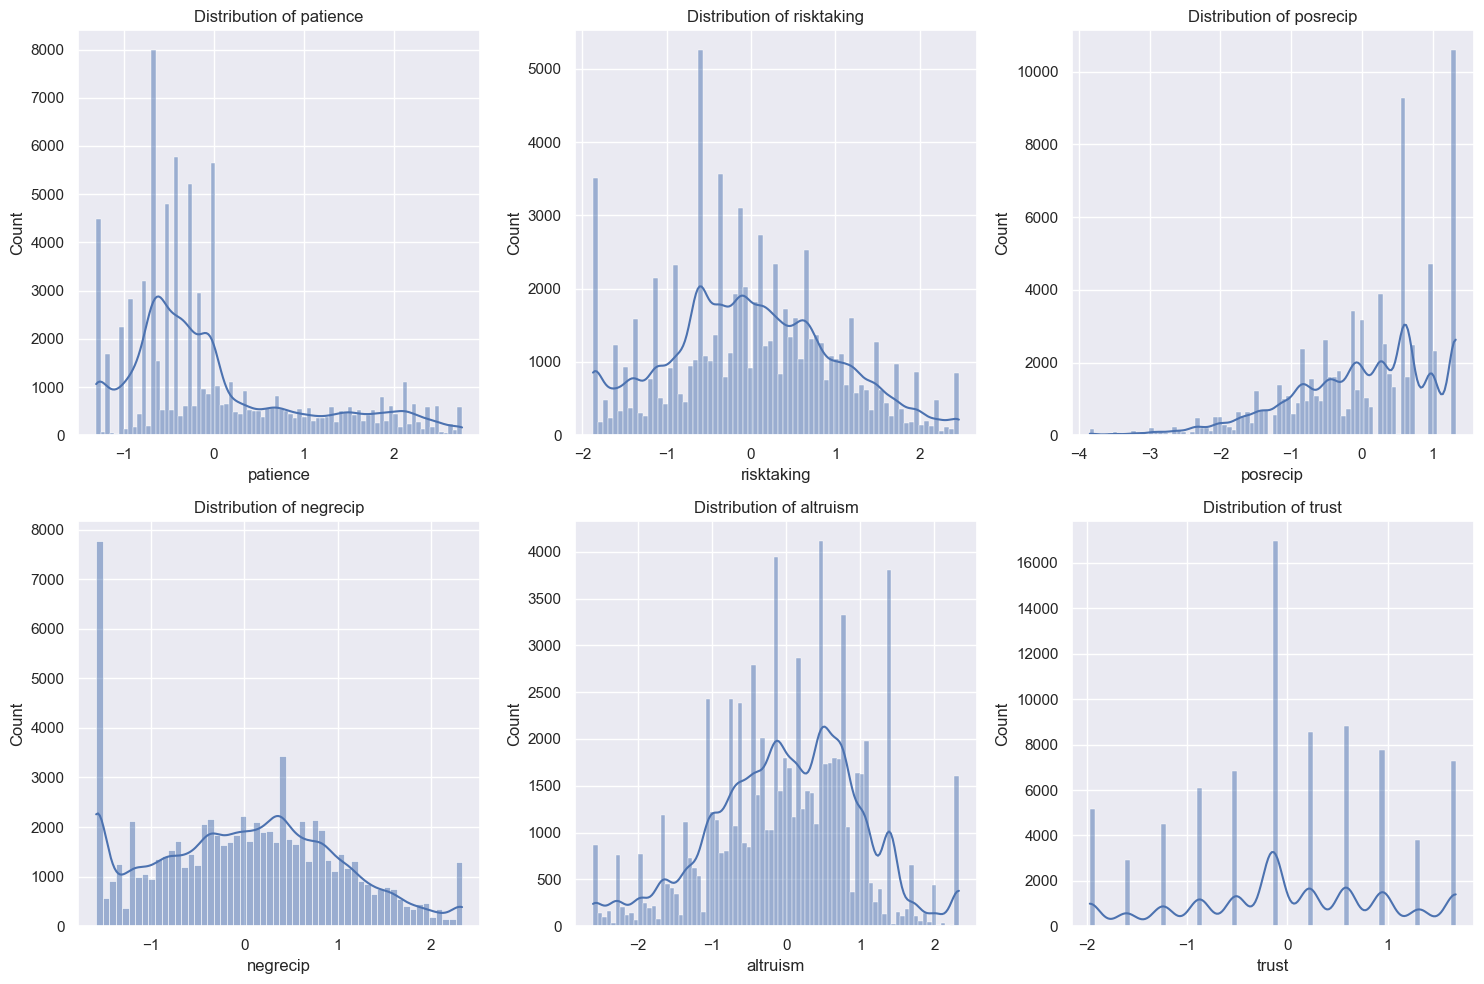

In [89]:
data = pd.read_csv("individual_new.csv", sep=",")

# Clean age column
data['age'] = data['age'].astype(str).str.extract('(\d+)').astype(float)  # Extract first numeric value
data['age'] = np.where(data['age'] > 100, np.nan, data['age'])  # Handle implausible values

# 1. Preference distributions
plt.figure(figsize=(15, 10))
prefs = ['patience', 'risktaking', 'posrecip', 'negrecip', 'altruism', 'trust']
for i, var in enumerate(prefs, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()



The charts show that:

- Patience and trust lean toward higher values.

- Positive reciprocity and altruism cluster above average.

- Risk-taking tends toward lower values.

- Negative reciprocity is moderate with few extreme cases.

→ Social preferences are generally higher than risk-taking and negative reciprocity.





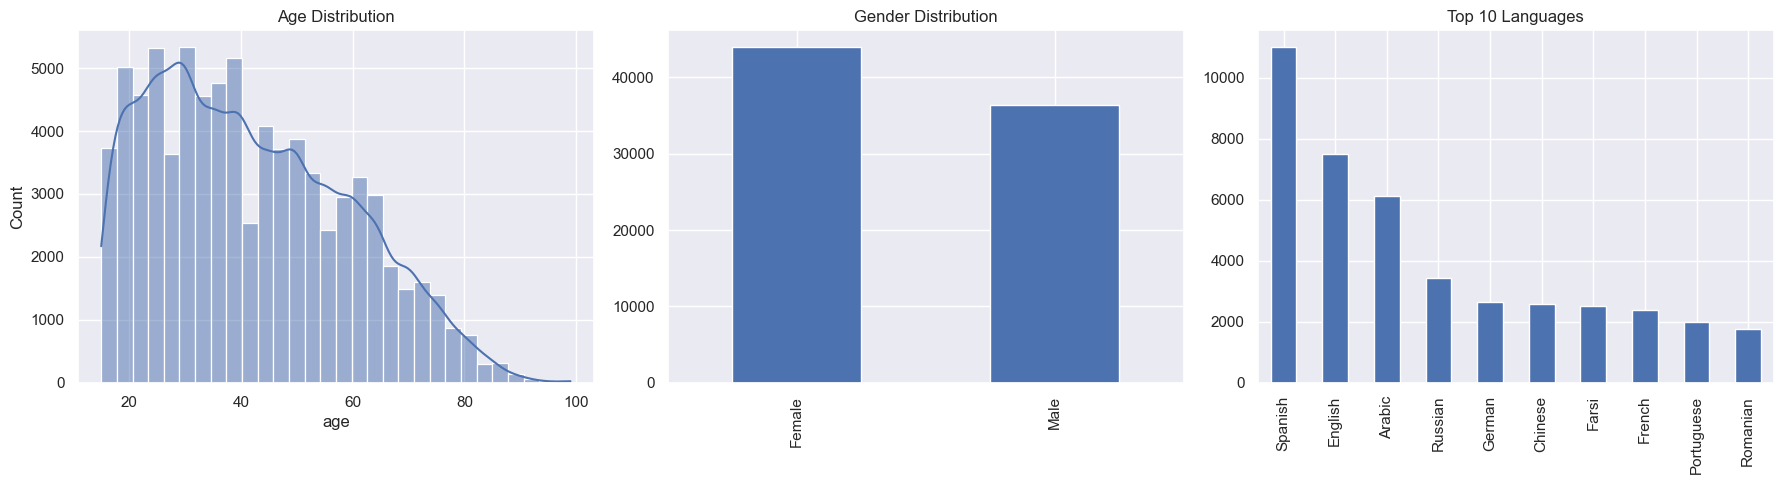

In [90]:
# Demographics + Language
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(data['age'].dropna(), bins=30, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

# Gender distribution
data['female'].map({0: 'Male', 1: 'Female'}) \
    .value_counts() \
    .plot(kind='bar', ax=ax[1])
ax[1].set_title('Gender Distribution')

# Language distribution
data['language'].value_counts().head(10).plot(kind='bar', ax=ax[2])
ax[2].set_title('Top 10 Languages')

plt.tight_layout()
plt.show()


The data shows a wide age range, with most respondents between their late teens and early 40s. Females slightly outnumber males. Spanish, English, and Arabic are the most common languages, followed by Russian and German

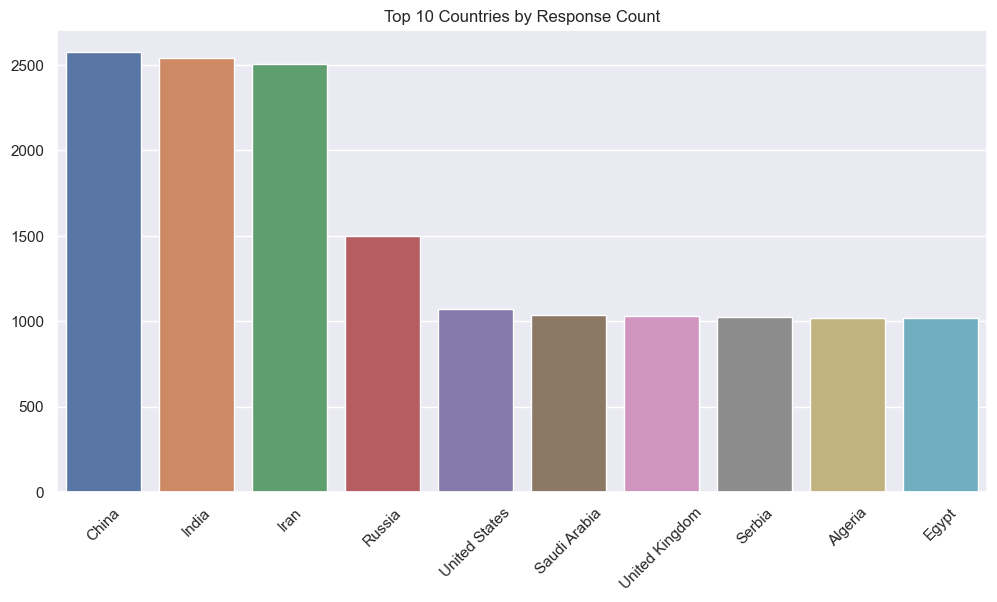

In [91]:

# 3. Country analysis
plt.figure(figsize=(12, 6))
country_counts = data['country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries by Response Count')
plt.xticks(rotation=45)
plt.show()


Gender Coefficients by Country


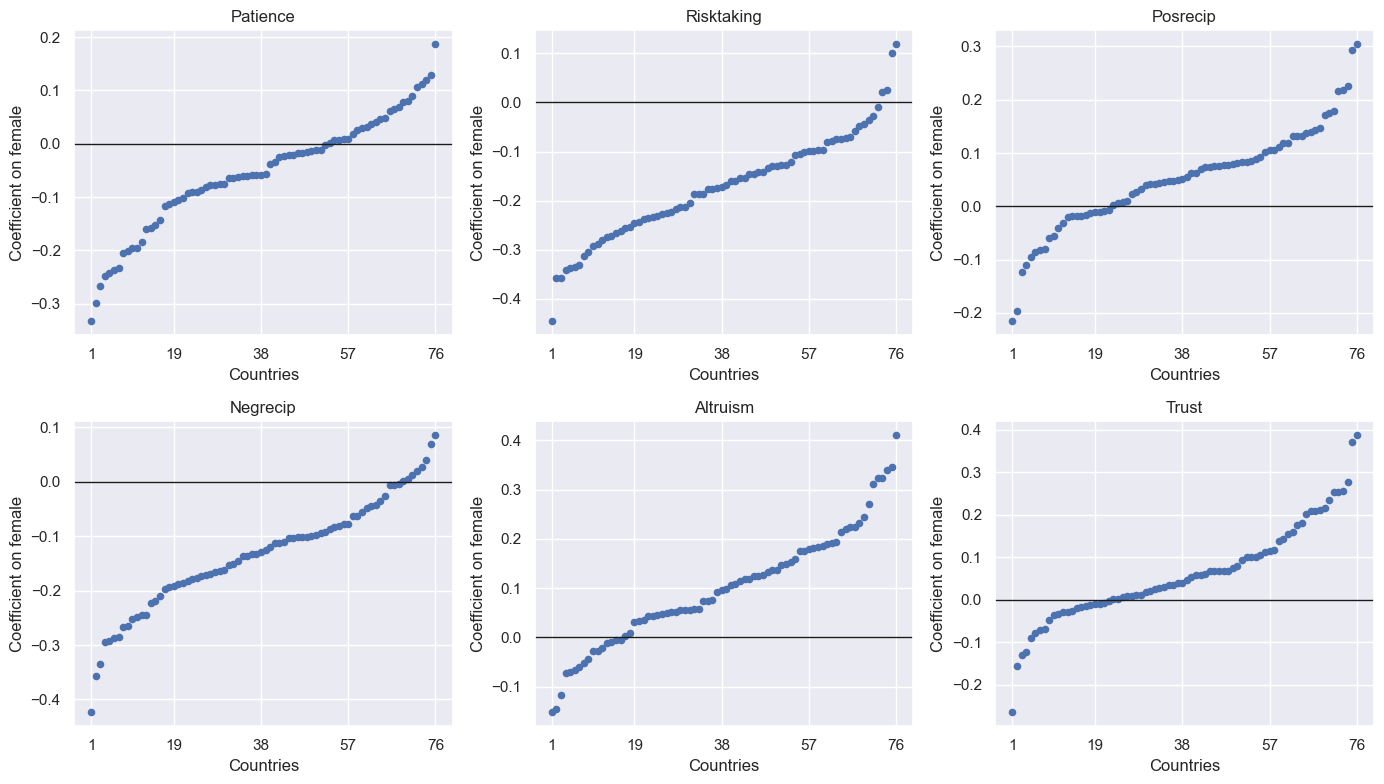

In [92]:

# prep
data['age100'] = pd.to_numeric(data['age'], errors='coerce') / 100
data['age100_sq'] = data['age100'] ** 2
data['female'] = pd.to_numeric(data['female'], errors='coerce')
data['subj_math_skills'] = pd.to_numeric(data['subj_math_skills'], errors='coerce')

def country_female_coeff(df, y):
    rows = []
    cols = ['country','female','subj_math_skills','age100','age100_sq', y]
    for c, d in df[cols].dropna().groupby('country'):
        if len(d) < 30:  # skip tiny samples
            continue
        m = smf.ols(f"{y} ~ female + subj_math_skills + age100 + age100_sq", data=d).fit()
        rows.append({'country': c,
                     'coef_female': m.params.get('female', np.nan),
                     'se_female':   m.bse.get('female', np.nan),
                     'n': int(m.nobs)})
    return (pd.DataFrame(rows)
              .dropna()
              .sort_values('coef_female')
              .reset_index(drop=True))

# build plots
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for ax, y in zip(axes, prefs):
    dfy = country_female_coeff(data, y)
    x = np.arange(1, len(dfy) + 1)  # 1..N positions

    ax.scatter(x, dfy['coef_female'], s=20)
    ax.axhline(0, color='k', lw=1)
    ax.set_title(y.title())
    ax.set_ylabel('Coefficient on female')
    ax.set_xlabel('Countries')

    # nice sparse ticks like 1, 20, 40, 60, N (scaled to N)
    n = len(dfy)
    ticks = sorted({1, int(round(n*0.25)), int(round(n*0.5)),
                    int(round(n*0.75)), n})
    ax.set_xticks([t for t in ticks if 1 <= t <= n])
print('Gender Coefficients by Country')
plt.tight_layout()
plt.show()


Math Skills Coefficients by Country


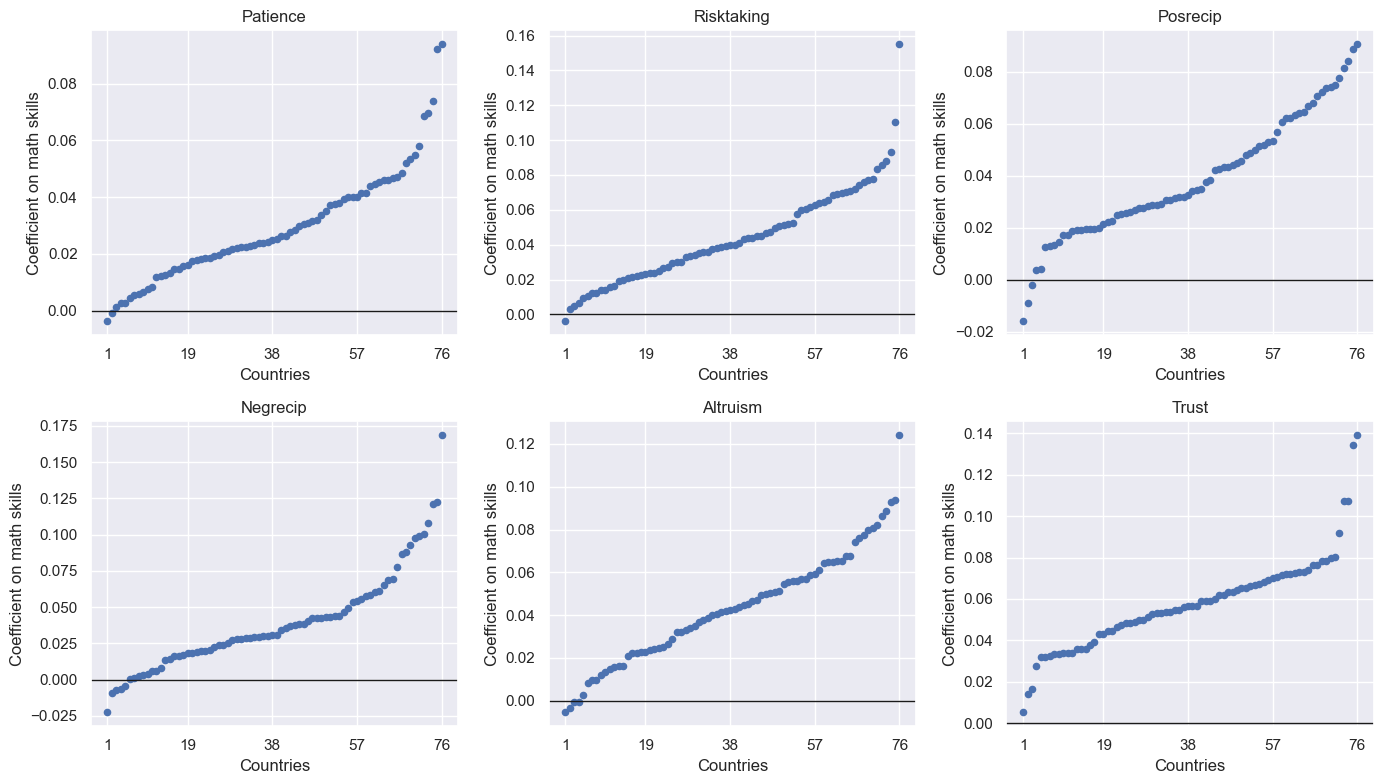

In [93]:
def country_math_coeff(df, y):
    """Within each country: y ~ female + subj_math_skills + age100 + age100_sq.
       Return sorted coefficients on subj_math_skills."""
    rows = []
    cols = ['country','female','subj_math_skills','age100','age100_sq', y]
    for c, d in df[cols].dropna().groupby('country'):
        if len(d) < 30:  # skip countries with tiny samples
            continue
        m = smf.ols(f"{y} ~ female + subj_math_skills + age100 + age100_sq", data=d).fit()
        rows.append({
            'country': c,
            'coef_math': m.params.get('subj_math_skills', np.nan),
            'se_math':   m.bse.get('subj_math_skills', np.nan),
            'n': int(m.nobs)
        })
    return (pd.DataFrame(rows)
              .dropna()
              .sort_values('coef_math')
              .reset_index(drop=True))

# build 2x3 grid of panels
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for ax, y in zip(axes, prefs):
    dfy = country_math_coeff(data, y)
    x = np.arange(1, len(dfy) + 1)  # positions 1..N

    ax.scatter(x, dfy['coef_math'], s=20)
    ax.axhline(0, color='k', lw=1)
    ax.set_title(y.title())
    ax.set_ylabel('Coefficient on math skills')
    ax.set_xlabel('Countries')

    # sparse ticks like 1, 20, 40, 60, N (scaled to N)
    n = len(dfy)
    ticks = sorted({1, int(round(n*0.25)), int(round(n*0.5)),
                    int(round(n*0.75)), n})
    ax.set_xticks([t for t in ticks if 1 <= t <= n])
print('Math Skills Coefficients by Country')
plt.tight_layout()
plt.show()

From the two figures: Gender and Math Skills Coefficients by Country.

It is clear that the impact of gender on preferences varies substantially across countries. Women are generally more altruistic in many countries, but tend to be less willing to take risks and less negatively reciprocal than men. For patience, however, the results are mixed: while some countries show women as more patient, in most countries the female coefficient is negative, indicating that women are less patient than men. This reflects differences in cultural, social, and national contexts. 

In contrast, math skills are almost always positively related to all preferences—particularly strongly for trust, negative reciprocity, and risk-taking—and with lower dispersion across countries, suggesting a more stable and universal relationship. This implies that cognitive (math skills) ability may play a more consistent and enduring role than gender in shaping preferences.

Compare female and male

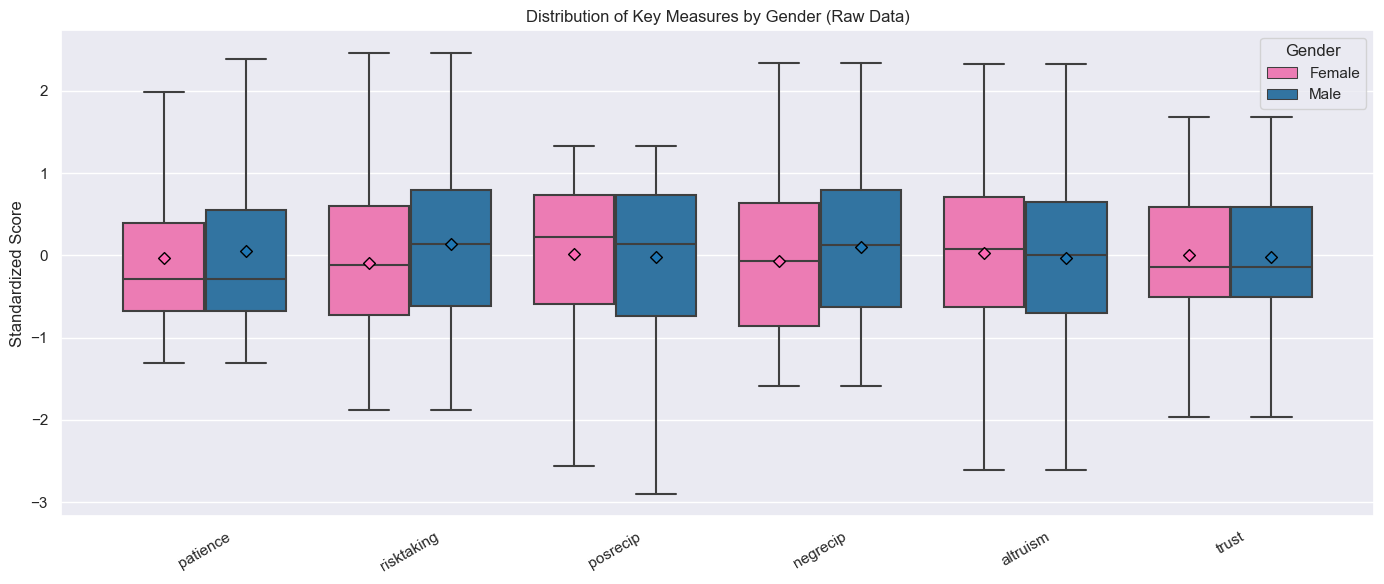

In [94]:

# ===== 1) Prepare long-format dataframe from raw data =====
plot_df = pd.melt(
    data[['female'] + prefs].dropna(),  # use raw variables instead of adjusted ones
    id_vars='female',
    value_vars=prefs,
    var_name='measure',
    value_name='value'
)

# Map gender labels
plot_df['Gender'] = plot_df['female'].map({1: 'Female', 0: 'Male'})

# Define the order of measures (same as prefs list)
order = prefs

# ===== 2) Custom color palette =====
palette = {
    'Female': '#ff69b4',  # pink
    'Male': '#1f77b4'     # blue
}

# ===== 3) Create boxplot =====
plt.figure(figsize=(14,6))
sns.boxplot(
    data=plot_df, x='measure', y='value', hue='Gender',
    order=order, showfliers=False, palette=palette
)

# ===== 4) Add mean markers for each gender =====
means = plot_df.groupby(['measure','Gender'])['value'].mean().reset_index()
for i, meas in enumerate(order):
    for g in ['Female', 'Male']:
        y_mean = means[(means['measure'] == meas) & (means['Gender'] == g)]['value'].values[0]
        x_jitter = i + (-0.2 if g == 'Female' else 0.2)  # small shift left/right
        plt.scatter(
            x_jitter, y_mean,
            marker='D', s=36, zorder=3,
            color=palette[g], edgecolor='black'
        )

# ===== 5) Final plot formatting =====
plt.title('Distribution of Key Measures by Gender (Raw Data)')
plt.xlabel('')
plt.ylabel('Standardized Score')
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()


The raw data visualization further illustrates these patterns: women tend to score lower than men in patience, risk-taking, negative reciprocity, and trust, while scoring higher in altruism and positive reciprocity. These differences are visible in both the mean and median values, suggesting they are not driven by a few outliers but reflect consistent gender-related tendencies across the sample.

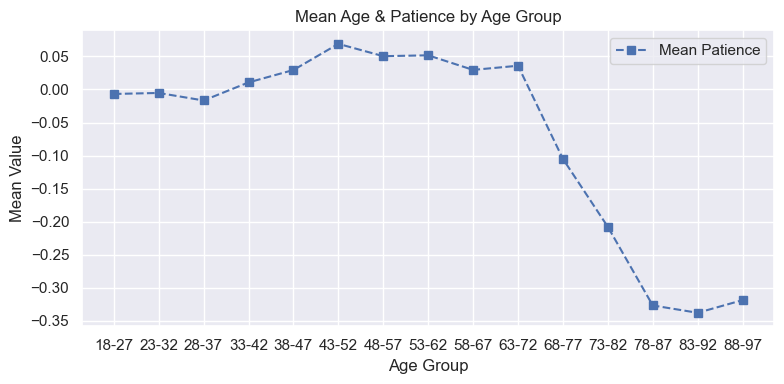

In [95]:

# Create 10-year age groups: [18-27, 28-37, …, 78-87]
bins = list(range(18, 98, 5))           # [18, 28, 38, ..., 78]
labels = [f"{b}-{b+9}" for b in bins[:-1]]
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate the mean of patience (and age if needed) by group
# mean_age = data.groupby('age_group')['age'].mean()
mean_patience = data.groupby('age_group')['patience'].mean()

# Plot line chart
plt.figure(figsize=(8, 4))
# plt.plot(mean_age.index, mean_age.values, marker='o', linestyle='-', label='Mean Age')
plt.plot(mean_patience.index, mean_patience.values, marker='s', linestyle='--', label='Mean Patience')
plt.title("Mean Age & Patience by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Value")
plt.legend()
plt.tight_layout()
plt.show()



The chart shows that patience follows an inverted U-shaped pattern across age groups. Patience is lowest among individuals under 33, rises to its peak between ages 43–52, and remains relatively high until the early 60s. After around age 68, patience declines sharply, reaching its lowest levels among those aged 78 and above. This suggests that middle-aged individuals tend to be the most patient, while both younger and especially older age groups display lower patience levels.

In [96]:
# filter subj_math_skills = 0 and keep wgt column
math0_info = data[data['subj_math_skills'] == 0][['country', 'region', 'age', 'wgt']]
math0_info


,country,region,age,wgt
93,Turkey,Ankara,35.0,0.325098
95,Turkey,Ankara,40.0,2.194235
130,Turkey,Antalya,53.0,1.659647
131,Turkey,Antalya,30.0,0.905326
248,Turkey,Bursa,26.0,1.039225
...,...,...,...,...
80196,Egypt,El-Menia,16.0,2.285095
80212,Egypt,El-Menia,23.0,1.135745
80235,Egypt,Sohag,52.0,0.873418
80293,Egypt,Sohag,26.0,2.271490


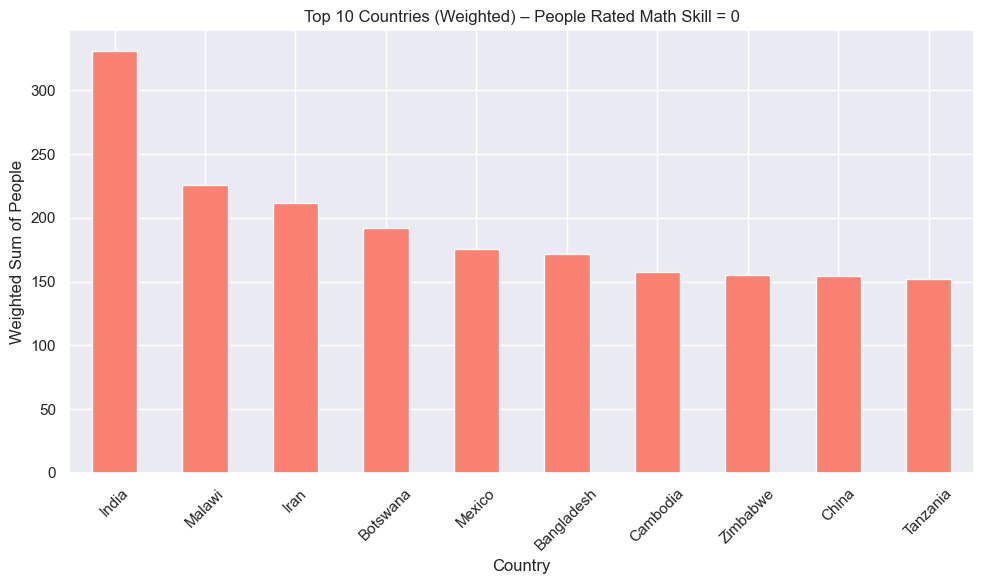

In [97]:

top10_weighted = math0_info.groupby('country')['wgt'].sum().sort_values(ascending=False).head(10)

#plot
top10_weighted.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Top 10 Countries (Weighted) – People Rated Math Skill = 0')
plt.xlabel('Country')
plt.ylabel('Weighted Sum of People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In the dataset, some respondents rated their math skills as 0. It is interesting to see which countries they come from. The chart above shows the top 10 countries (weighted) with the highest number of people who rated their math skills as 0, with India leading by a large margin, followed by Malawi, Iran, and Botswana.

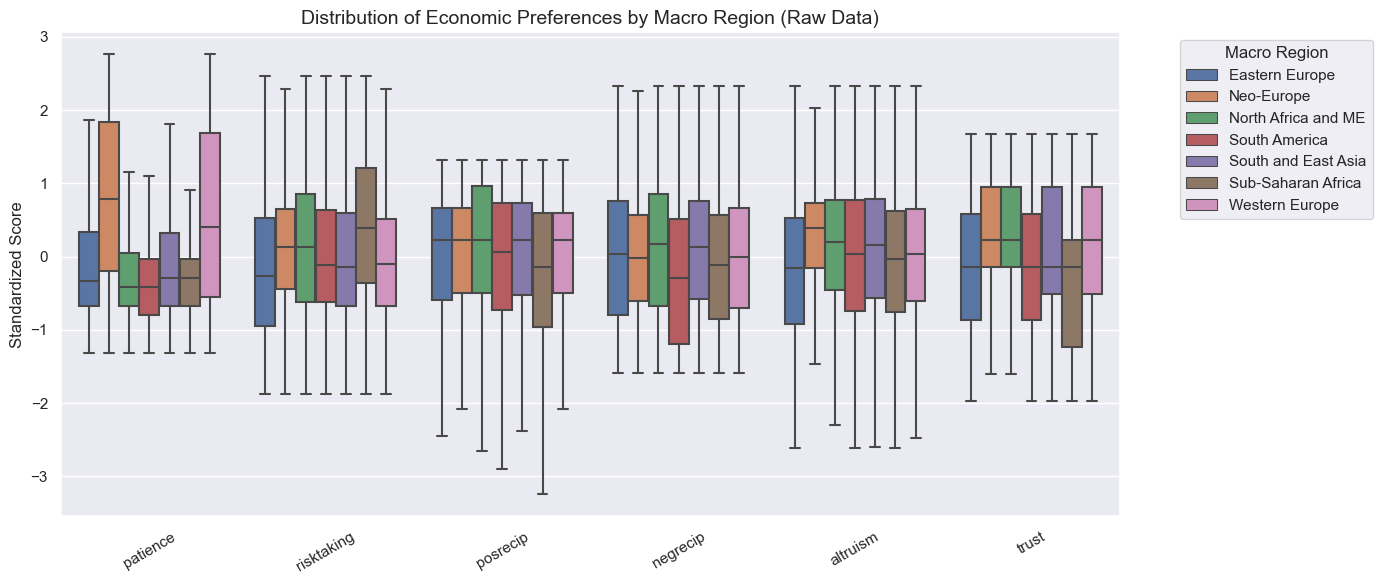

In [100]:
# Convert data from wide to long format for easier plotting
plot_df = data.melt(
    id_vars='macro_region',
    value_vars=preferences,
    var_name='Preference',
    value_name='Score'
).dropna()

# Sort macro_region alphabetically (or you can set a custom order)
order_regions = sorted(plot_df['macro_region'].dropna().unique())

# Plot boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=plot_df,
    x='Preference', 
    y='Score', 
    hue='macro_region',
    order=preferences,
    hue_order=order_regions,
    showfliers=False  # Hide outliers for a cleaner look
)

# Customize chart labels and style
plt.title('Distribution of Economic Preferences by Macro Region (Raw Data)', fontsize=14)
plt.xlabel('')
plt.ylabel('Standardized Score')
plt.xticks(rotation=30)  # Rotate x-axis labels for readability
plt.legend(title='Macro Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The boxplot compares six preferences across seven macro regions:

- Neo-Europe and Western Europe stand out for having the highest patience and trust, with Western Europe being more risk-averse.

- Eastern Europe scores lower in patience, risk-taking, and altruism.

- Sub-Saharan Africa shows the highest risk-taking but the lowest trust and altruism.

- North Africa & Middle East combine high risk-taking with low patience.

- South & East Asia are generally risk-averse, moderately patient, and high in positive reciprocity.

- South America is low in patience and negative reciprocity, while mid-range in other prosocial traits.

These visual patterns are consistent with the REGIONAL AVERAGES AND VARIANCE DECOMPOSITION results in 1b, confirming that both summary statistics and distribution plots reflect similar regional differences in preferences.

#### b)
Pick at least one preference measure. <br>
For this measure, create an interactive map with `folium` that tells you the average in the country in the given year. <br>
*Hint 1: Be cautious with country names.* <br>
*Hint 2: Consider the sampling weights when taking the (weighted) average.*

In [101]:
unique_dates = pd.Series(data['date'].unique())
unique_dates = unique_dates.sort_values()
print(unique_dates)

220    01 Apr 12
157    01 Aug 12
227    01 Dec 12
239    01 Jul 12
56     01 Jun 12
         ...    
280    31 Dec 12
189    31 Jul 12
219    31 Mar 12
72     31 May 12
257          NaN
Length: 326, dtype: object


In [102]:
# 1. Parse the strings into datetimes (coercing failures to NaT)
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# 2. Drop any rows where parsing failed, if you don’t need them
data = data.dropna(subset=['date'])

# 3. Extract the year and see how many distinct ones there are
years = data['date'].dt.year
print("Unique years:", sorted(years.unique()))
print("Number of years:", years.nunique())

Unique years: [2012, 2013]
Number of years: 2


In [ ]:

# --- load & prep once ---
df = pd.read_csv('individual_new.csv')
df['date']    = pd.to_datetime(df['date'], format='%d %b %y')
df['year']    = df['date'].dt.year
df['isocode'] = df['isocode'].str.upper()

# compute every country‐year‐measure average
measures = [
    'patience', 'risktaking', 'posrecip',
    'negrecip', 'altruism', 'trust',
]
country_avg = (
    df
    .groupby(['isocode', 'country', 'year'])[measures]
    .mean()
    .reset_index()
)

# list of years present
years = sorted(country_avg['year'].unique())

# GeoJSON for world countries (feature.id holds ISO A3)
world_geo = (
    'https://raw.githubusercontent.com/python-visualization/'
    'folium/master/examples/data/world-countries.json'
)

def plot_map(measure: str, year: int):
    # filter to selected measure & year
    data_year = country_avg[country_avg['year'] == year][['isocode', measure]]
    # build map
    m = folium.Map(location=[20, 0], zoom_start=2)
    folium.Choropleth(
        geo_data=world_geo,
        name=f'Avg {measure}',
        data=data_year,
        columns=['isocode', measure],
        key_on='feature.id',
        fill_color='YlGn',
        nan_fill_color='lightgrey',
        legend_name=f'Average {measure.capitalize()} in {year}'
    ).add_to(m)
    folium.LayerControl().add_to(m)
    return m

# create interactive controls
interact(
    plot_map,
    measure=widgets.Dropdown(options=measures, value='trust', description='Measure:'),
    year=widgets.Dropdown(options=years,    value=years[0], description='Year:')
)


interactive(children=(Dropdown(description='Measure:', index=5, options=('patience', 'risktaking', 'posrecip',…

<function __main__.plot_map(measure: str, year: int)>

The interactable map (only usable in ipynb file) allows users to see the average of any preferences of any year given in the dataset. Preferences and years can be chosen by clicking on the Measure and Year menu, respectively.


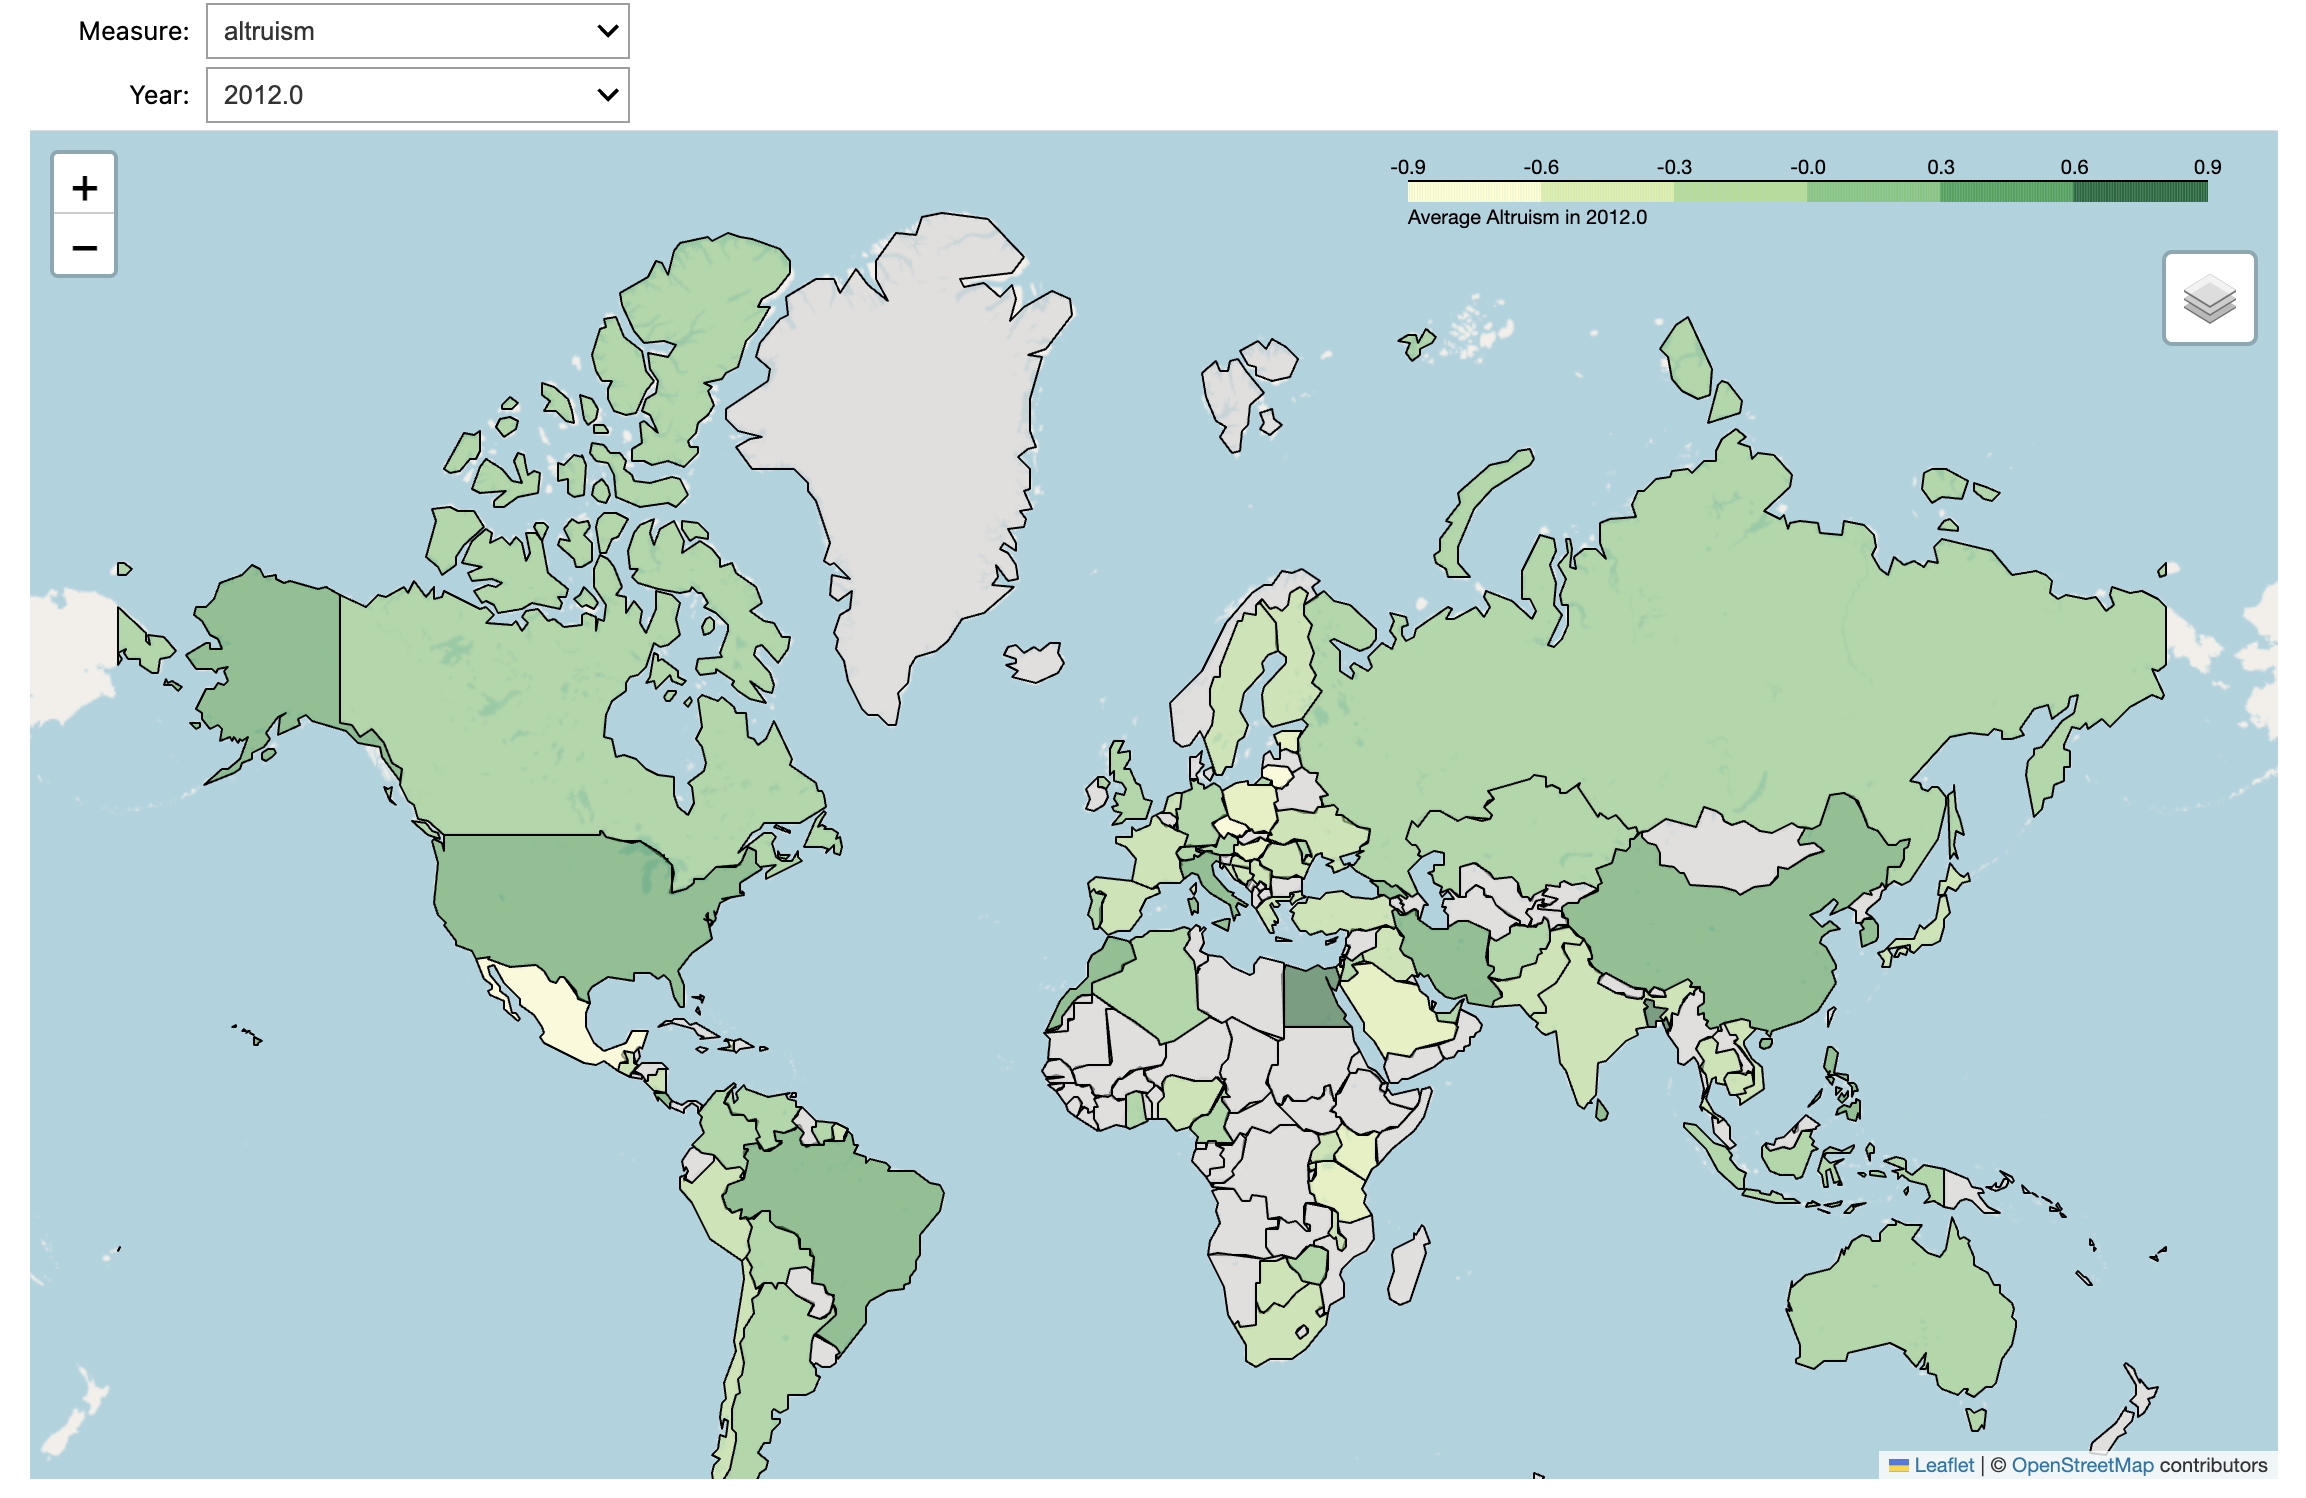

## Problem 3 - Supervised Machine Learning
#### a)
Try to predict the subjects' countries of origin using the information provided. <br>
Report the performance measures for different predictor variables.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning

In [6]:

# Read the CSV file
df = pd.read_csv('individual_new.csv')

# List of columns to drop
columns_to_drop = ["isocode", "ison", "region", "language", "date", "id"]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Convert age column to string first to handle any unexpected formats
df_cleaned['age'] = df_cleaned['age'].astype(str)

# Remove non-numeric values from age column
df_cleaned = df_cleaned[df_cleaned['age'].str.match(r'^\d+$')]

# Convert age to integer
df_cleaned['age'] = df_cleaned['age'].astype(int)

# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Save to a new CSV file
# df_cleaned.to_csv('individual_cleaned.csv', index=False)

In [7]:
# Extract data
data = df_cleaned.copy()

# Features and target variable
features = ['patience', 'risktaking', 'posrecip', 'negrecip', 
           'altruism', 'trust', 'subj_math_skills', 'female', 'age']

# Encode the country variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['country'])

# Extract features
X = data[features]

First, we ran multiple machine learning algorithms to compare their accuracy. 

To evaluate the accuracy, we chose two metrics: Accuracy and F1-score. These are two common evaluated metrics used in classification problem. The first metric shows the proportion of correctly classified samples out of all predictions, giving an overall measure of how often the model is correct. The second metric shows the balance between precision and recall, providing a better indication of performance when the data is imbalanced or when both false positives and false negatives are important. 

In [7]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate classification models
def evaluate_model(model, X, y, cv=5):
    # Cross-validation setup
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Metrics lists
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for train_idx, test_idx in kfold.split(X):
        # Get train and test sets for this fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Get the sample weights from the data
        weight_train = data.iloc[train_idx]['wgt'].values
        
        # Train model with handling for algorithms that don't support sample_weight
        if isinstance(model, KNeighborsClassifier):
            model.fit(X_train, y_train)  # KNN doesn't support sample_weight
        else:
            try:
                # Try with sample_weight
                model.fit(X_train, y_train, sample_weight=weight_train)
            except TypeError:
                # Fallback if sample_weight is not supported
                print(f"Model {model.__class__.__name__} encounters problem with sample_weight. Training without it.")
                model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate classification metrics
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    return {
        'accuracy': accuracy_scores,
        'precision': precision_scores,
        'recall': recall_scores,
        'f1': f1_scores
    }


# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_scores = evaluate_model(lr_model, X, y)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = evaluate_model(dt_model, X, y)

# 3. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_scores = evaluate_model(knn_model, X, y)

# 4. Support Vector Machine
# svm_model = SVC(probability=True, random_state=42)
# svm_scores = evaluate_model(svm_model, X, y)

# 5. Naive Bayes
nb_model = GaussianNB()
nb_scores = evaluate_model(nb_model, X, y)

# 6. Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_scores = evaluate_model(rf_model, X, y)

# 7. XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_scores = evaluate_model(xgb_model, X, y)


In [8]:
# Display results
print("\nCross-Validation Results:")
print(f"Logistic Regression: Mean Accuracy = {np.mean(lr_scores['accuracy']):.4f}, F1-Score = {np.mean(lr_scores['f1']):.4f}")
print(f"Decision Tree: Mean Accuracy = {np.mean(dt_scores['accuracy']):.4f}, F1-Score = {np.mean(dt_scores['f1']):.4f}")
print(f"K-Nearest Neighbors: Mean Accuracy = {np.mean(knn_scores['accuracy']):.4f}, F1-Score = {np.mean(knn_scores['f1']):.4f}")
print(f"Naive Bayes: Mean Accuracy = {np.mean(nb_scores['accuracy']):.4f}, F1-Score = {np.mean(nb_scores['f1']):.4f}")
print(f"Random Forest: Mean Accuracy = {np.mean(rf_scores['accuracy']):.4f}, F1-Score = {np.mean(rf_scores['f1']):.4f}")
print(f"XGBoost: Mean Accuracy = {np.mean(xgb_scores['accuracy']):.4f}, F1-Score = {np.mean(xgb_scores['f1']):.4f}")


Cross-Validation Results:
Logistic Regression: Mean Accuracy = 0.0789, F1-Score = 0.0510
Decision Tree: Mean Accuracy = 0.0712, F1-Score = 0.0713
K-Nearest Neighbors: Mean Accuracy = 0.0558, F1-Score = 0.0523
Naive Bayes: Mean Accuracy = 0.0911, F1-Score = 0.0640
Random Forest: Mean Accuracy = 0.1409, F1-Score = 0.1336
XGBoost: Mean Accuracy = 0.2387, F1-Score = 0.2335


From the output, we observed that Random Forest: Mean Accuracy = 0.1409, F1-Score = 0.1336  and XGBoost: Mean Accuracy = 0.2387, F1-Score = 0.2335 achieved the highest accuracy among all tested. Therefore, we selected these two algorithms to analyze feature importance, as they delivered the best predictive performance.

In [9]:
def check_importance(model):
    importance = model.feature_importances_
    # Create a DataFrame for better visualization
    feat_importance = pd.DataFrame({
        'Feature': features,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    print(f"\nFeature Importance of {model.__class__.__name__}:")
    print(feat_importance)

# check_importance(lr_model)
check_importance(rf_model)
check_importance(xgb_model)


Feature Importance of RandomForestClassifier:
            Feature  Importance
4          altruism    0.148058
3          negrecip    0.142376
1        risktaking    0.140722
8               age    0.135570
0          patience    0.121323
2          posrecip    0.110425
6  subj_math_skills    0.090731
5             trust    0.079768
7            female    0.031027

Feature Importance of XGBClassifier:
            Feature  Importance
4          altruism    0.154102
0          patience    0.127791
5             trust    0.111803
2          posrecip    0.110723
1        risktaking    0.106318
6  subj_math_skills    0.103539
3          negrecip    0.102665
8               age    0.095806
7            female    0.087251


After checking, we found that age and female are less important features in XGBoost, while they are trust and female for Random Forest. To this end, we will drop these regarded variables to see if the accuracy improves.

Option 1: Drop the lowest importance features

In [14]:
# Simply drop the lowest importance features for XGBoost and Random Forest
X_simple = X.copy()
X_xgboost = X_simple.drop(columns=['age', 'female'])
X_simple = X.copy()
X_rf = X_simple.drop(columns=['trust', 'female'])

# Run XGBoost and Random Forest again
xgb_scores = evaluate_model(xgb_model, X_xgboost, y)
rf_scores = evaluate_model(rf_model, X_rf, y)
print("\nResults with simplified features:")
print(f"XGBoost: Mean Accuracy = {np.mean(xgb_scores['accuracy']):.4f}, F1-Score = {np.mean(xgb_scores['f1']):.4f}")
print(f"Random Forest: Mean Accuracy = {np.mean(rf_scores['accuracy']):.4f}, F1-Score = {np.mean(rf_scores['f1']):.4f}")


Results with simplified features:
XGBoost: Mean Accuracy = 0.2365, F1-Score = 0.2306
Random Forest: Mean Accuracy = 0.1253, F1-Score = 0.1190


The results show that when dropping the two variables, the accuracy is lower, not improved. This may indicate that all variables contribute to the prediction.


Option 2: Try PCA to reduce unimportanted features, reevaluate to see if it improves the accuracy  

We tried with XGBoost first to see if PCA works.

In [15]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# First, standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA: keeping enough components to explain x% (0 - 95%) of variance
pca = PCA(n_components=0.95) # or use PCA(n_components=0.95) for variance-based selection
X_pca = pca.fit_transform(X_scaled)

# Print explained variance information
print(f"\nNumber of components selected: {pca.n_components_}")

# Show how original features map to principal components
component_df = pd.DataFrame(
    pca.components_, 
    columns=features
)
print("\nPrincipal components composition:")
print(component_df)

# Now let's evaluate the models with the PCA-transformed data
print("\nEvaluating models with PCA-transformed data...")

# Function to evaluate model with PCA data
def evaluate_model_pca(model, X_pca, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    accuracy_scores = []
    f1_scores = []
    
    for train_idx, test_idx in kfold.split(X_pca):
        X_train_pca, X_test_pca = X_pca[train_idx], X_pca[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Get the sample weights
        weight_train = data.iloc[train_idx]['wgt'].values
        
        model.fit(X_train_pca, y_train, sample_weight=weight_train)
        
        y_pred = model.predict(X_test_pca)
        
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    return {
        'accuracy': np.mean(accuracy_scores),
        'f1': np.mean(f1_scores)
    }

# Evaluate the top models using PCA-transformed data
xgb_pca_scores = evaluate_model_pca(xgb.XGBClassifier(random_state=42), X_pca, y)

# Display results
print("\nResults with PCA:")
print(f"XGBoost: Accuracy = {xgb_pca_scores['accuracy']:.4f}, F1-Score = {xgb_pca_scores['f1']:.4f}")


Number of components selected: 9

Principal components composition:
   patience  risktaking  posrecip  negrecip  altruism     trust  \
0 -0.339956   -0.422163 -0.346872 -0.342873 -0.398343 -0.296303   
1  0.110449    0.377313 -0.486153  0.320130 -0.433434 -0.302252   
2  0.116621   -0.183486 -0.227756  0.058394 -0.267957  0.354038   
3  0.439061    0.025636 -0.281235  0.239172 -0.188568  0.321997   
4  0.718780    0.087728  0.145807 -0.270804  0.058582 -0.472979   
5 -0.133632   -0.025338  0.087798  0.679245  0.187273 -0.030249   
6 -0.080430   -0.279354  0.095704  0.393036  0.020678 -0.591827   
7 -0.346163    0.725955 -0.139784 -0.165036  0.112448 -0.120691   
8  0.071105   -0.178048 -0.674316 -0.054020  0.703223 -0.048731   

   subj_math_skills    female       age  
0         -0.405410  0.142349  0.192960  
1          0.024856 -0.276289 -0.387857  
2          0.348902 -0.488996  0.582629  
3         -0.086691  0.707847  0.149898  
4         -0.221374 -0.156047  0.283844  
5       

When evaluating the XGBoost model on the PCA-transformed data, the accuracy (0.0913) and F1-score (0.0831) were significantly lower compared to using the original features. This suggests that, in this case, applying PCA did not improve performance and may have removed useful feature relationships that the original model could leverage.

#### b)
Try to fill the gaps in the preference measures in the data using appropriate prediction models.

Since the preference measures are contineuous values, we use regression models here. XGBoost is chosen as it shows best performance in the question a).
The following code creates a pipeline to train diffrent XGBoost for different preference metric (using loop). Trained model then fills missing value of the targeted metric. Noted that we have added a new column called 'ML_generated' to indicate which row has at least one of its preference values is filled by ML model.

In [ ]:
# load the cleaned data for training
df_train = data.copy()

# load the original data with missing values
df_raw = pd.read_csv('individual_new.csv')

# In the raw data, there are age values: 99 99+, we will remove them as well
# Convert age column to string first to handle any unexpected formats
df_raw['age'] = df_raw['age'].astype(str)
df_raw = df_raw[df_raw['age'].str.match(r'^\d+$')]
df_raw['age'] = df_raw['age'].astype(int)

# the six preference columns we want to fill, try with 2 first
# pref_measures = ['patience', 'risktaking']

# run fill six preference measures
pref_measures = ['patience', 'risktaking', 'posrecip', 
                 'negrecip', 'altruism', 'trust']

# Initialize ML_generated column with 0 
df_raw['ML_generated'] = 0

# encode country once 
df_train['country_enc'] = LabelEncoder().fit_transform(df_train['country'])
df_raw['country_enc'] = LabelEncoder().fit_transform(df_raw['country'])

# other features, we use for training and input predictions, but not for prediction targets
base_feats = ['country_enc', 'subj_math_skills', 'female', 'age']

for target in pref_measures:
    # features for this target (don't include the target itself)
    feats = base_feats + [m for m in pref_measures if m != target]
    
    # split train vs predict
    pred_mask = df_raw[target].isna()
    # Check if there are any missing values in the target column
    print(f"\nMissing values need to be filled: {target} - {df_raw[target].isna().sum()}")

    X_train = df_train[feats]
    y_train = df_train[target]
    weight_train = df_train['wgt']
    # There are more features in df_raw, but we only need the ones we use for training
    X_pred = df_raw.loc[pred_mask, feats]

    # train a regressor
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train, y_train, sample_weight=weight_train)
    # fill missing
    df_raw.loc[pred_mask, target] = model.predict(X_pred)
    
    # Set ML_generated to 1 for rows where we filled missing values
    df_raw.loc[pred_mask, 'ML_generated'] = 1

# drop the country encoded and save to new file
df_raw.drop(columns=['country_enc'], inplace=True)



Missing values need to be filled: patience - 588

Missing values need to be filled: risktaking - 620

Missing values need to be filled: posrecip - 144

Missing values need to be filled: negrecip - 1780

Missing values need to be filled: altruism - 428

Missing values need to be filled: trust - 1545


 We want to know whether the filled data may break the original distribution of non-filled data. Therefore, we redraw the distrubution figures of preferences and comapre these them to that of [Question 2) Data visualization](#problem-2---data-visualization). 

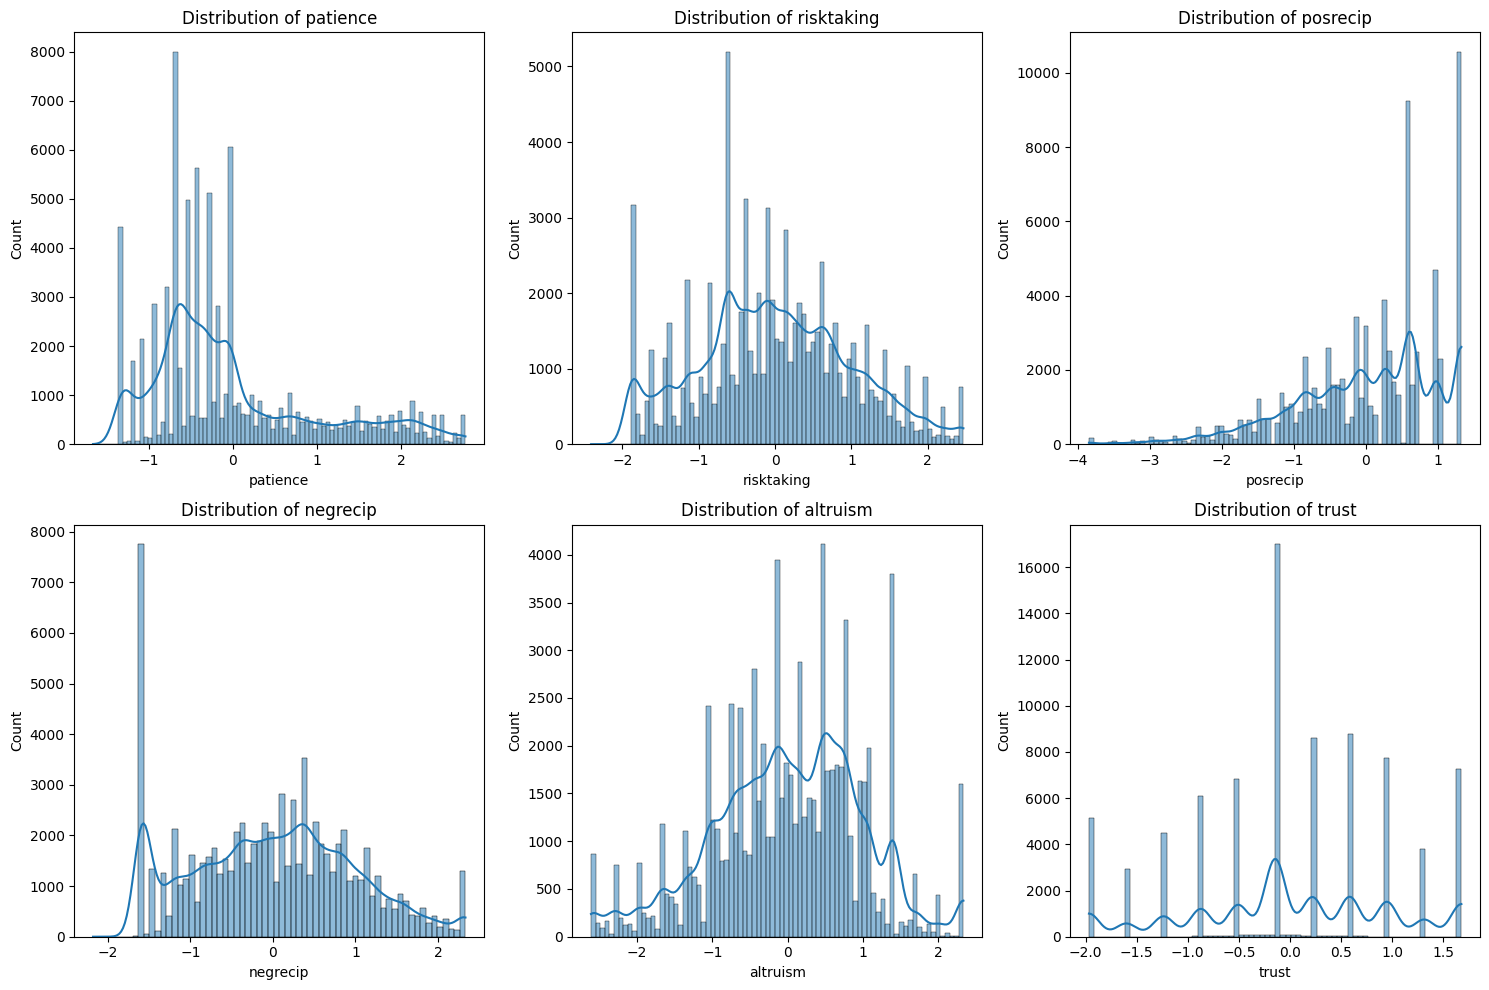

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preference distributions
plt.figure(figsize=(15, 10))
prefs = ['patience', 'risktaking', 'posrecip', 'negrecip', 'altruism', 'trust']
for i, var in enumerate(prefs, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_raw[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

These graphs show no noticable differences between the distrubtion of original data (with missing values) and that of ML-generated data (without missing values). This suggests that ML model has generated missing values following closely with the trained data. 

## Problem 4 - Unsupervised Machine Learning
#### a)
Use the preference measures to cluster *individuals*. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

In [9]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [10]:
# Use the filled data for further analysis
df = df_raw.copy()

# Drop columns not used in clustering.
# The preference measures we use are: patience, risktaking, posrecip, negrecip, altruism, trust.
# Note: wgt is a sampling weight and is dropped.
cols_to_drop = ['country', 'isocode', 'ison', 'region', 'language', 'date', 'id', 
                'female', 'age', 'subj_math_skills', 'ML_generated', 'wgt']
df_features = df.drop(columns=cols_to_drop)

# check if there are any NaN or any value that is not float64, print columns with NaN or non-float64 values
for col in df_features.columns:
    if df_features[col].isna().any():
        print(f"Column {col} has NaN values.")


In [11]:


# Determine optimal number of clusters via silhouette scores.
sil_scores = []
k_values = range(2, 10, 1)  # Testing k from 6 to 76 with step 5
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_features)
    sil = silhouette_score(df_features, labels)
    sil_scores.append(sil)
    print(f"For k = {k}, silhouette score = {sil:.3f}")



For k = 2, silhouette score = 0.154
For k = 3, silhouette score = 0.150
For k = 4, silhouette score = 0.161
For k = 5, silhouette score = 0.150
For k = 6, silhouette score = 0.144
For k = 7, silhouette score = 0.138
For k = 8, silhouette score = 0.136
For k = 9, silhouette score = 0.134


The Silhouette score combines cohesion (how close points are within the same cluster) and separation (how far they are from other clusters) into a score between -1 and 1. A high score means clusters are well-separated and internally tight, while low or negative scores indicate overlapping or poorly formed clusters. 

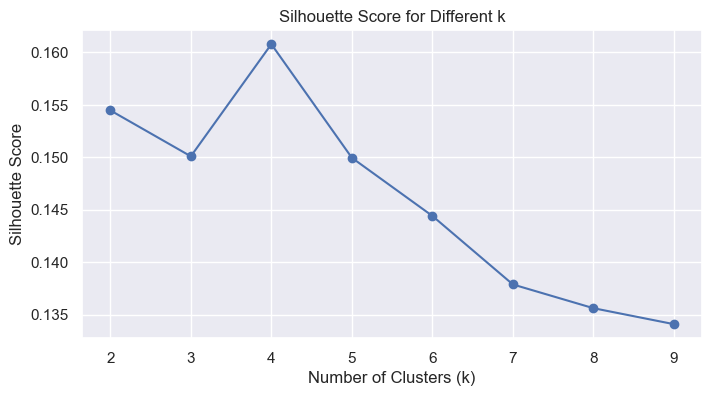


Optimal number of clusters determined: 4

Cluster Summary (mean values for each preference measure):
         patience  risktaking  posrecip  negrecip  altruism     trust  \
cluster                                                                 
0        1.755047    0.254992  0.145045  0.098678  0.123886  0.109970   
1       -0.432961   -0.243641 -0.995653 -0.163508 -0.921993 -0.469524   
2       -0.244029    0.577365  0.319216  0.872463  0.330408  0.255816   
3       -0.494924   -0.530626  0.556342 -0.819819  0.480983  0.123404   

         subj_math_skills  
cluster                    
0                5.731787  
1                4.417913  
2                5.739646  
3                4.953269  


In [12]:

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(8, 4))
plt.plot(list(k_values), sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.show()

# Choose the number of clusters that gives the best silhouette score.
optimal_k = k_values[sil_scores.index(max(sil_scores))]
print(f"\nOptimal number of clusters determined: {optimal_k}")

# Cluster individuals using the optimal number of clusters.
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans_final.fit_predict(df_features)

# Print summary statistics of each cluster to provide intuition.
cluster_summary = df.groupby('cluster')[['patience', 'risktaking', 'posrecip', 'negrecip', 
                                           'altruism', 'trust', 'subj_math_skills']].mean()
print("\nCluster Summary (mean values for each preference measure):")
print(cluster_summary)

The cluster summary shows the average (mean) value of each feature for the individuals in each cluster. Since the preference measures have been normalized to a mean of 0, the numbers tell you how much a particular cluster deviates from the overall average for that measure. For example:

- **Cluster 0:**  Highly Patient, Moderately Positive

Patience is much higher than all other clusters.
All other traits (risk-taking, reciprocity, altruism, trust) are slightly above zero — balanced and slightly prosocial.
Suggests calm, measured individuals who are not extreme in risk or social behavior.

- **Cluster 1:**  Low Social Cooperation, Low Trust

Patience and risk-taking are slightly negative.
Very low positive reciprocity, altruism, and trust — indicating reluctance to help others or trust people.
Likely cautious and socially reserved individuals.

- **Cluster 2:**  Risk-Takers with Strong Reactions

Above-average risk-taking and positive reciprocity.
Very high negative reciprocity — strong negative reaction when wronged.
Mix of cooperation and defensiveness; may be competitive but fair-minded.
  
- **Cluster 3:**  Low Patience, High Emotional Response

Low patience and risk-taking.
High negative reciprocity but also high altruism — willing to help, yet reacts strongly to unfairness.
Suggests emotionally intense but prosocial individuals.
Overall, these means provide intuition into the general behavioral profile of individuals within each cluster.

#### b)
Use the preference measures to cluster *countries*. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

We need to aggregate preferences of individuals belong to each country then use the aggregated values to cluster countries.
First we need to aggregate (or group) individuals' perferences by country using sampling weights.

In [13]:
# First aggregate preferences of individuals belong to each country  
# Then use the aggregated results to cluster country


preference_cols = ['patience', 'risktaking', 'posrecip', 'negrecip', 
                   'altruism', 'trust']

def weighted_mean(group):
    return pd.Series(
        np.average(group[preference_cols], weights=group['wgt'], axis=0),
        index=preference_cols  # Explicitly preserve column names
    )


Hypothesis 1: countries can be groupped to big regions (continents, geographies, etc.). Therefore, I test low number of cluster, from 2 to 6 with step 1. Then from 6 increases to 76 with step 5 to lower the runtime.  

Head of aggregated country preferences:
       country  patience  risktaking  posrecip  negrecip  altruism     trust
0  Afghanistan -0.201577    0.121687  0.289641  0.251616  0.166455  0.312189
1      Algeria  0.059600    0.391530 -0.598255  0.254029 -0.009968 -0.176752
2    Argentina -0.229620    0.041034  0.159860 -0.144207  0.028114 -0.205170
3    Australia  0.657357    0.140072  0.072441  0.016386  0.153510  0.300238
4      Austria  0.606452   -0.061572  0.163069 -0.056827 -0.041036  0.156713
For k = 2, silhouette score = 0.199
For k = 3, silhouette score = 0.212
For k = 4, silhouette score = 0.188
For k = 5, silhouette score = 0.177
For k = 6, silhouette score = 0.172
For k = 11, silhouette score = 0.169
For k = 16, silhouette score = 0.174
For k = 21, silhouette score = 0.164
For k = 26, silhouette score = 0.160
For k = 31, silhouette score = 0.177
For k = 36, silhouette score = 0.164
For k = 41, silhouette score = 0.157
For k = 46, silhouette score = 0.139
For k = 51, silhouette

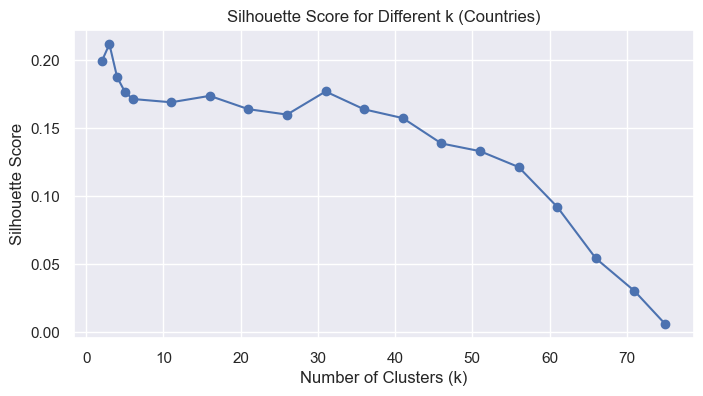


Optimal number of clusters determined: 3

Cluster Summary (Weighted Averages):
         patience  risktaking  posrecip  negrecip  altruism     trust
cluster                                                              
0       -0.080062    0.168673 -0.385591  0.072136 -0.302771 -0.190568
1        0.410523    0.032350  0.104671  0.136773  0.107680  0.128729
2       -0.279459   -0.152683  0.191867 -0.155749  0.095874  0.012611


In [14]:
# Aggregate by country using WEIGHTED MEANS

df_countries = df.groupby('country').apply(weighted_mean).reset_index()
# df_countries.columns = ['country'] + preference_cols  
print(f"Head of aggregated country preferences:\n{df_countries.head()}")

X = df_countries[preference_cols]  # Use directly (already normalized)
# Find optimal k using silhouette score
sil_scores = []
k_values = range(6, 76, 5)  # Testing k from 6: continent to 76 with step 5
k_values = [2, 3, 4, 5] + list(k_values) + [75]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    print(f"For k = {k}, silhouette score = {sil:.3f}")

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k (Countries)")
plt.show()

# Fit final model with optimal k
optimal_k = k_values[np.argmax(sil_scores)]
print(f"\nOptimal number of clusters determined: {optimal_k}")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df_countries['cluster'] = kmeans_final.fit_predict(X)

# Interpret clusters
cluster_summary = df_countries.groupby('cluster')[preference_cols].mean()
print("\nCluster Summary (Weighted Averages):")
print(cluster_summary)

# Optional: Save results
# df_countries.to_csv("country_clusters_weighted.csv", index=False)

In [15]:
# Showing which countries belong to which cluster
print("\nCountries in each cluster:")
for cluster_id, group in df_countries.groupby('cluster'):
    print(f"Cluster {cluster_id}: {list(group['country'])}")


Countries in each cluster:
Cluster 0: ['Algeria', 'Botswana', 'Czech Republic', 'Estonia', 'Ghana', 'Greece', 'Haiti', 'India', 'Iraq', 'Japan', 'Kenya', 'Lithuania', 'Malawi', 'Mexico', 'Nigeria', 'Pakistan', 'Peru', 'Poland', 'Rwanda', 'Saudi Arabia', 'South Africa', 'Tanzania', 'Turkey', 'Uganda', 'Vietnam', 'Zimbabwe']
Cluster 1: ['Australia', 'Austria', 'Bangladesh', 'Bolivia', 'Canada', 'China', 'Croatia', 'Finland', 'France', 'Germany', 'Israel', 'Italy', 'Moldova', 'Netherlands', 'Philippines', 'South Korea', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 2: ['Afghanistan', 'Argentina', 'Bosnia Herzegovina', 'Brazil', 'Cambodia', 'Cameroon', 'Chile', 'Colombia', 'Costa Rica', 'Egypt', 'Georgia', 'Guatemala', 'Hungary', 'Indonesia', 'Iran', 'Jordan', 'Kazakhstan', 'Morocco', 'Nicaragua', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Sri Lanka', 'Thailand', 'Ukraine', 'Venezuela']


Cluster 0 – Moderate Patience, Lower Social Cooperation

- Profile: Slightly patient, moderate risk-taking, but lower cooperation (low positive reciprocity & altruism), and low trust.
- Likely traits: More individualistic cultures, moderate patience, less willingness to help strangers, cautious trust.

Countries:
'Algeria', 'Botswana', 'Czech Republic', 'Estonia', 'Ghana', 'Greece', 'Haiti', 'India', 'Iraq', 'Japan', 'Kenya', 'Lithuania', 'Malawi', 'Mexico', 'Nigeria', 'Pakistan', 'Peru', 'Poland', 'Rwanda', 'Saudi Arabia', 'South Africa', 'Tanzania', 'Turkey', 'Uganda', 'Vietnam', 'Zimbabwe'

Cluster 1 – Cooperative, Trusting Societies
- Profile: Highest patience, slightly cooperative, higher trust, low risk-taking.
- Likely traits: Stable, community-oriented societies with strong social capital.

Countries:
'Australia', 'Austria', 'Bangladesh', 'Bolivia', 'Canada', 'China', 'Croatia', 'Finland', 'France', 'Germany', 'Israel', 'Italy', 'Moldova', 'Netherlands', 'Philippines', 'South Korea', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States'

Cluster 2 – Lower Patience & Risk-Averse but Mildly Cooperative
- Profile: Low patience, low risk-taking, mildly positive reciprocity and altruism, low trust, low retaliation.
- Likely traits: Cautious, mildly cooperative societies preferring stability over high risk.

Countries:
'Afghanistan', 'Argentina', 'Bosnia Herzegovina', 'Brazil', 'Cambodia', 'Cameroon', 'Chile', 'Colombia', 'Costa Rica', 'Egypt', 'Georgia', 'Guatemala', 'Hungary', 'Indonesia', 'Iran', 'Jordan', 'Kazakhstan', 'Morocco', 'Nicaragua', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Sri Lanka', 'Thailand', 'Ukraine', 'Venezuela'

In [ ]:

# 1) Map countries to macro regions
df = df_countries.copy()
df['macro_region'] = df['country'].map(macro_region).fillna('Other/Unknown')

# 2) Count matrix: regions x clusters
counts = pd.crosstab(df['macro_region'], df['cluster']).sort_index()

# 3) Proportions
#   a) Share of clusters *within each region* (rows sum to 1)
row_props = counts.div(counts.sum(axis=1), axis=0)

#   b) Share of regions *within each cluster* (columns sum to 1)
col_props = counts.div(counts.sum(axis=0), axis=1)

# 4) Over/under-representation (lift):
#    Compare a region’s share inside a cluster vs its overall dataset share.
region_overall_share = counts.sum(axis=1) / counts.values.sum()
cluster_region_share = col_props  # same as step 3b
lift = cluster_region_share.div(region_overall_share, axis=0)
# lift > 1 => region over-represented in that cluster; < 1 => under-represented.

# 5) Quick summaries
top_region_per_cluster = (
    col_props.apply(lambda s: s.sort_values(ascending=False).head(3).to_dict())
)

# 6) (Optional) Countries per (region, cluster) for drill-down
countries_by_rc = (
    df.groupby(['macro_region','cluster'])['country']
      .apply(lambda s: sorted(s.unique()))
)

# ---- Print or inspect ----
print("Counts by macro region x cluster:\n", counts, "\n")
print("Row proportions (cluster mix within each region):\n", row_props.round(3), "\n")
print("Column proportions (region mix within each cluster):\n", col_props.round(3), "\n")
print("Lift (over-representation > 1):\n", lift.round(2), "\n")
print("Top regions per cluster (by share within cluster):\n", top_region_per_cluster, "\n")
print("Countries per (macro_region, cluster):\n", countries_by_rc.to_string())


Counts by macro region x cluster:
 cluster               0  1  2
macro_region                 
Eastern Europe        4  2  7
Neo-Europe            0  3  0
North Africa and ME   4  2  4
Other/Unknown         1  3  0
South America         3  2  8
South and East Asia   4  4  6
Sub-Saharan Africa   10  0  1
Western Europe        0  7  1 

Row proportions (cluster mix within each region):
 cluster                  0      1      2
macro_region                            
Eastern Europe       0.308  0.154  0.538
Neo-Europe           0.000  1.000  0.000
North Africa and ME  0.400  0.200  0.400
Other/Unknown        0.250  0.750  0.000
South America        0.231  0.154  0.615
South and East Asia  0.286  0.286  0.429
Sub-Saharan Africa   0.909  0.000  0.091
Western Europe       0.000  0.875  0.125 

Column proportions (region mix within each cluster):
 cluster                  0      1      2
macro_region                            
Eastern Europe       0.154  0.087  0.259
Neo-Europe           0.

Overrepresented Regions per Cluster

Cluster 0 – Dominated by Sub-Saharan Africa
- 90.9% of Sub-Saharan African countries fall into Cluster 0.
- Suggests these countries share traits like slightly lower cooperation but high representation in this cluster.
- Also includes a few from Eastern Europe, South America, and South & East Asia.

Cluster 1 – Concentrated in Neo-Europe & Western Europe
- 100% of Neo-Europe (USA, Canada, Australia) and 87.5% of Western Europe countries fall here.
- Indicates high patience, higher trust, and cooperation — aligns with developed, stable economies.

Cluster 2 – Strong in Eastern Europe & South America
- 53.8% of Eastern Europe and 61.5% of South America are in Cluster 2.
- Also significant representation from South & East Asia (42.9%).
- Traits suggest lower patience, moderate cooperation, more cautious risk attitudes.

